## Naratip Chakansin
## 6430197521

# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



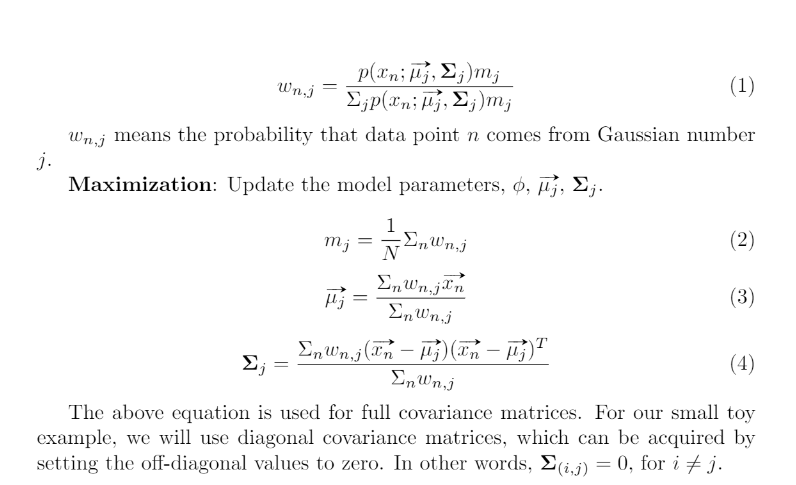

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal
from os import path
if not path.exists('Sarabun-Regular.ttf'):
    !wget https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf -O Sarabun-Regular.ttf

--2024-02-20 18:23:35--  https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/sarabun/Sarabun-Regular.ttf [following]
--2024-02-20 18:23:39--  https://raw.githubusercontent.com/google/fonts/main/ofl/sarabun/Sarabun-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90220 (88K) [application/octet-stream]
Saving to: ‘Sarabun-Regular.ttf’

Sarabun-Regular.ttf 100%[===================>]  88.11K   229KB/s    in 0.4s    

2024-02-20 18:23:40 (229 KB/s) - ‘Sarabun-Regular.ttf’ saved [9

In [4]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params

        # Initiailize iteration.
        self.n_iter = 0

    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """
        # print(self.mean_params.shape)
        # print(self.cov_params.shape)
        W = []
        for i in range(self.mean_params.shape[0]):
            w = multivariate_normal.pdf(data, mean = self.mean_params[i], cov = self.cov_params[i])
            w = w * self.mixture_weight[i]
            W.append(w)
        W = np.array(W)
        W = W / np.sum(W, axis = 0)
        return W


    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """
        self.mixture_weight = np.sum(w, axis = 1) / w.shape[1]
        mu = []
        for i in range(data.shape[1]):
            temp = w * data[:, i]
            temp = np.sum(temp, axis = 1)
            temp = temp / np.sum(w, axis = 1)
            mu.append(temp)
        self.mean_params = np.array(mu).T
        sigma = []
        for i in range(w.shape[0]):
            temp =((data - self.mean_params[i]).T @ (data - self.mean_params[i]))
            temp = temp.reshape(temp.shape + (1,)) * w[i]
            temp = np.sum(temp, axis=-1) / np.sum(w[i])
            sigma.append(temp)
        # print(np.array(sigma).shape)
        self.cov_params = np.array(sigma)

    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """
        prob = []
        for i in range(self.mean_params.shape[0]):
            temp = multivariate_normal.pdf(data, mean = self.mean_params[i], cov=self.cov_params[i])
            temp = temp * self.mixture_weight[i]
            prob.append(temp)
        prob = np.array(prob)
        prob = np.sum(prob, axis = 0)
        prob = np.log(prob)
        log_prob = np.sum(prob)
        return log_prob

    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):

            # TODO: Perform EM step.

            w = self.estimation_step(data=data)
            if(display):
                print("w:")
                print(w)
            self.maximization_step(data=data,w=w)


            # Calculate log prob.
            log_prob = self.get_log_likelihood(data)
            log_prob_list.append(log_prob)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_iteration()

        return log_prob_list

In [5]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1] * num_mixture # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)
print(mean_params.shape, cov_params.shape, len(mixture_weight))
X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T
print(data.shape)
gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

(3, 2) (3, 2, 2) 3
(9, 2)
Initialization
m :
 [1, 1, 1]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
w:
[[1.19202922e-01 7.31058579e-01 2.68941421e-01 9.99983299e-01
  9.99088949e-01 9.99876605e-01 2.31952283e-16 2.31952283e-16
  3.30570063e-37]
 [8.80797076e-01 2.68941421e-01 7.31058579e-01 1.67014218e-05
  9.11051194e-04 1.23394576e-04 1.38879439e-11 1.38879439e-11
  5.90009054e-29]
 [1.81545808e-09 1.69570706e-16 1.01529005e-11 2.03105874e-42
  5.37528453e-32 3.30529272e-37 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]
Iteration: 0
m :
 [0.45757242 0.20909425 0.33333333]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[353.01147604 364.87556007]
  [364.87556007 381.80507627]]

 [[200.00099517 206.72247297]
  [206.72247297 221.351677  ]]

 [[488.99999969 523.99999962]
  [523.99

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



In [6]:
import seaborn as sns

[-51.38213053152622, -48.32841820497899, -48.315489536930315]


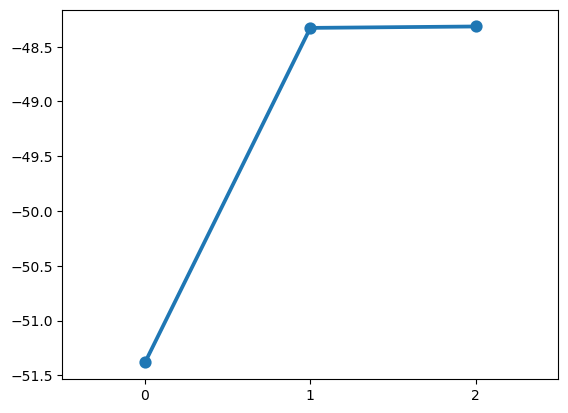

In [7]:
print(log_prob_list)
sns.pointplot(log_prob_list)
plt.show()

    ANS : จากกราฟ log likelihood เพิ่มขึ้นในแต่ละ iteration

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



In [8]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight=mixture_weight, cov_params=cov_params, mean_params=mean_params)
log_prob_list2 = gmm2.perform_em_iterations(data=data,num_iterations=3)

Initialization
m :
 [1, 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
w:
[[9.99999985e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 2.31952283e-16 2.31952283e-16
  3.30570063e-37]
 [1.52299795e-08 2.31952283e-16 3.77513454e-11 2.03109266e-42
  5.38018616e-32 3.30570063e-37 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]
Iteration: 0
m :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[272.25000045 286.00000042]
  [286.00000042 305.33333371]]

 [[488.9999974  523.99999684]
  [523.99999684 566.66666287]]]
-------------------------------------------------------------
w:
[[0.7460684  0.74286003 0.73956714 0.75572127 0.75127884 0.75361425
  0.71920555 0.69107087 0.69786163]
 [0.2539316  0.25713997 0.26043286 0.24427873 0.24872116 0.24638575
  0.28079445 0.30892913 0.30213837]]
Iterati

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

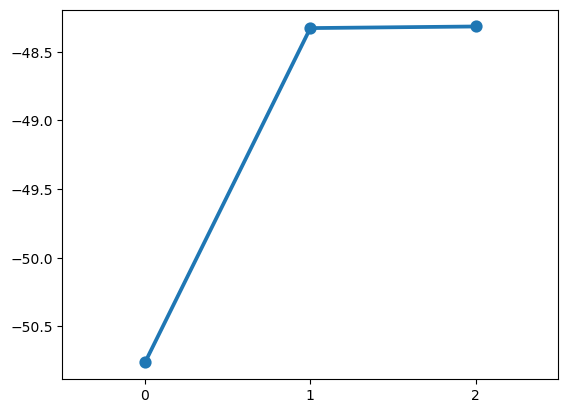

In [9]:
# TODO: Plot log_likelihood from T3
sns.pointplot(log_prob_list2)
plt.show()

In [10]:
import pandas as pd

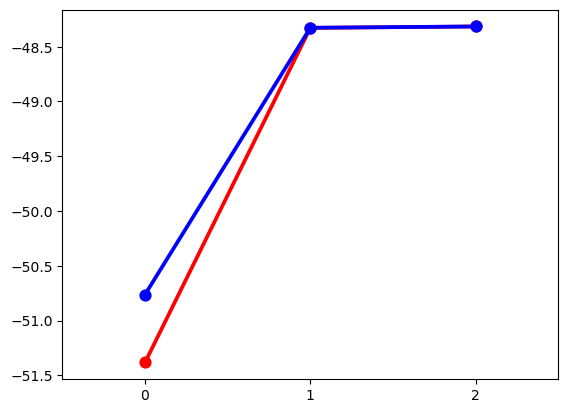

In [11]:
# TODO: Plot Comparision of log_likelihood from T1 and T3
sns.pointplot(log_prob_list,color='r') #T1
sns.pointplot(log_prob_list2, color='b') #T3
plt.show()

    ANS : T3 มี log likelihood ดีกว่าใน iteration แรก

In [12]:
#OT1
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[0,0], [10000,10000]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm3 = GMM(mixture_weight=mixture_weight, cov_params=cov_params, mean_params=mean_params)
log_prob_list3 = gmm3.perform_em_iterations(data=data,num_iterations=3)

Initialization
m :
 [1, 1]
mu :
 [[    0.     0.]
 [10000. 10000.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
w:
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


/tmp/ipykernel_225941/628422179.py:40: RuntimeWarning: invalid value encountered in divide
  temp = temp / np.sum(w, axis = 1)


ValueError: array must not contain infs or NaNs

    ANS เกิด value error เพราะ varian เป็น 0 
    สามารถแก้ได้ด้วยการกำหนดค่า floor เพื่อไม่ให้ varian เป็น 0

# The face database

In [ ]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip facedata_mat.zip

In [13]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = './facedata_mat/facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

(40, 10)

### Preprocess xf

In [14]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

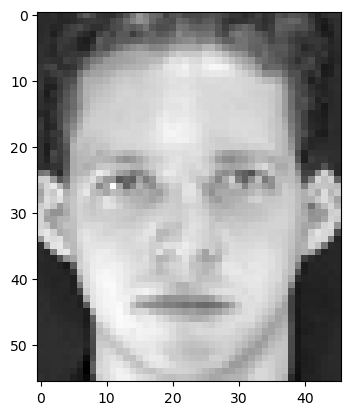

In [15]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [16]:
xf.shape

(40, 10, 56, 46)

In [17]:
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """
    return np.sqrt(np.sum((x1.reshape(-1) - x2.reshape(-1))**2))

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


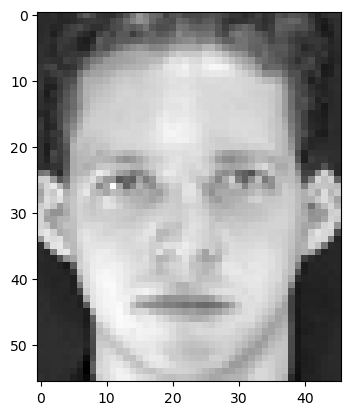

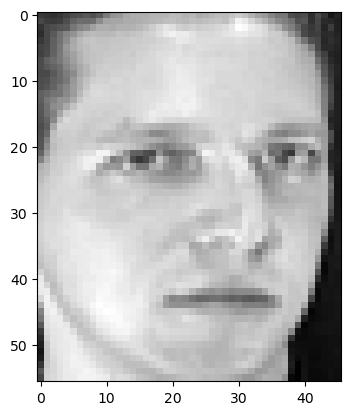

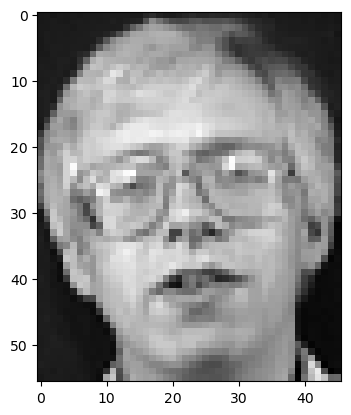

In [18]:
# TODO: Show why does the numbers make sense
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()
plt.imshow(xf[0,1], cmap = 'gray')
plt.show()
plt.imshow(xf[1,0], cmap = 'gray')
plt.show()

    ANS : euclidean_distance make no sense เพราะจากตัวเลขและรูปจะเห็นว่า รูปหนึ่งและสองเป็นรูปคนเดียวกันแต่หันหน้าไปคนละทางแต่รูปที่สามเป็นรูปของอีกคน แต่ตัวเลขของรูปหนึ่งกับสามใกล้กว่ารูปหนึ่งกับสองซึ่งไม่ถูกต้อง

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [19]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    shape = matrix.shape
    return matrix.reshape(shape[0]*shape[1], shape[2]*shape[3])


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """
    similarity_matrix = []
    for i in range(A.shape[0]):
        col = []
        for j in range(B.shape[0]):
            temp = L2_dist(A[i],B[j])
            col.append(temp)
        similarity_matrix.append(col)
    similarity_matrix = np.array(similarity_matrix)
    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    print(test_A.shape, test_B.shape)
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

(2, 2) (3, 2)


In [20]:
#TODO: Show similariry matrix between T and D.

T = xf[:,:3,:,:]
D = xf[:,3:,:,:]
A = organize_shape(T)
B = organize_shape(D)
print(T.shape,A.shape,D.shape,B.shape)

similarity_matrix = generate_similarity_matrix(A,B)

(40, 3, 56, 46) (120, 2576) (40, 7, 56, 46) (280, 2576)


In [21]:
similarity_matrix.shape

(120, 280)

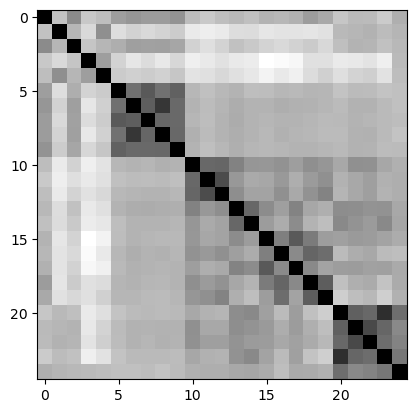

In [22]:
t = xf[:5,:5,:,:]
d = xf[:5,:5,:,:]
a = organize_shape(t)
b = organize_shape(d)
plt.imshow(generate_similarity_matrix(a,b), cmap='gray')
plt.show()

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


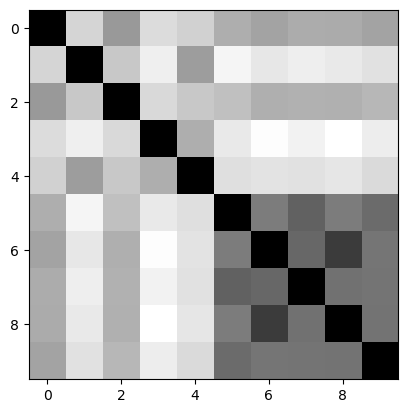

In [23]:
# INSERT CODE HERE
plt.imshow(generate_similarity_matrix(a[:10],b[:10]), cmap='gray')
plt.show()

        ANS : จาก plot ค่าของ person number 2 เมื่อเทียบกับตัวเองมีค่าใกล้เคียงกันมากทำให้มี pixel ไปทางสีดำขณะที่ person number 1 เมื่อเทียบกับตัวเองจะมีค่าสูงบ้างต่ำบ้างไม่ชัดเจนทำให้ยากต่อการแยกว่าเป็นรูปคนเดียวกันหรือไม่

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [24]:
def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """
    
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(similarity_matrix.shape[0] // 3):
        for j in range(similarity_matrix.shape[1]):
            if(np.min(similarity_matrix[i*3:(i*3)+3, j]) < threshold):
                if(i== j//7):
                    TP += 1
                else:
                    FP += 1
            else:
                if(i== j//7):
                    FN += 1
                else:
                    TN += 1
    true_pos_rate = (TP) / (TP + FN)
    false_neg_rate = FP / (FP + TN)
    # print(np.array([[TP,FP],
    #                 [FN,TN]]))
    return true_pos_rate, false_neg_rate

# Quick check
# (true_pos_rate, false_neg_rate) should be (0.9928571428571429, 0.33507326007326005)
evaluate_performance(similarity_matrix, 9.5)

(0.9928571428571429, 0.33507326007326005)

In [25]:
# INSERT CODE HERE
evaluate_performance(similarity_matrix, 10)

(0.9964285714285714, 0.4564102564102564)

        ANS: true positive rate = 0.9964285714285714, false alarm rate = 0.4564102564102564

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [26]:
def calculate_roc(input_mat):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_neg_rate from the given matrix.
    """
    min = np.min(input_mat)
    max = np.max(input_mat)
    ts = np.linspace(min,max, 1000)
    tpr_list = []
    far_list = []
    for t in (ts):
        tpr, far = evaluate_performance(input_mat,t)
        tpr_list.append(tpr)
        far_list.append(far)
    return tpr_list, far_list

def plot_roc(input_mat):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    tpr_list, far_list = calculate_roc(input_mat)
    sns.lineplot(x = far_list, y = tpr_list)
    plt.show()

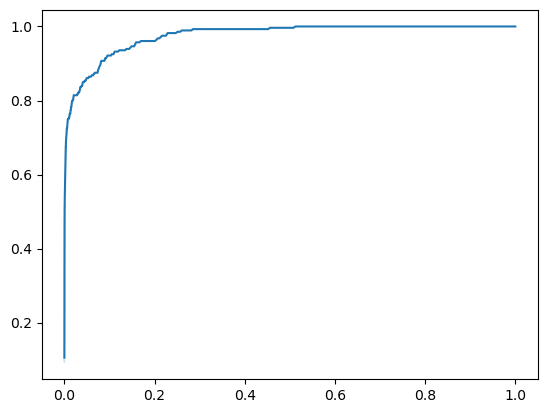

In [27]:
# INSERT CODE HERE
plot_roc(similarity_matrix)

    ANS:

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



In [28]:
# You can add more parameter(s) to the function in the previous question.
import math
# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.
def evaluate_performance_2(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(similarity_matrix.shape[0] // 3):
        for j in range(similarity_matrix.shape[1]):
            if(np.min(similarity_matrix[i*3:(i*3)+3, j]) < threshold):
                if(i== j//7):
                    TP += 1
                else:
                    FP += 1
            else:
                if(i== j//7):
                    FN += 1
                else:
                    TN += 1
    true_pos_rate = (TP) / (TP + FN)
    false_neg_rate = FP / (FP + TN)
    # print(np.array([[TP,FP],
    #                 [FN,TN]]))
    return true_pos_rate, false_neg_rate, FP, FN
def calculate_roc_2(input_mat):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_neg_rate from the given matrix.
    """
    min = np.min(input_mat)
    max = np.max(input_mat)
    ts = np.linspace(min,max, 1000)
    for t in (ts):
        tpr, far,FP,FN = evaluate_performance_2(input_mat,t)
        # print(tpr, far)
        if( math.isclose(tpr, far*(-1) + 1,abs_tol = 0.004)):
            print("At EER tpr and far is ",tpr, far) 
        if( math.isclose(far, 0.001,abs_tol=0.0001)):
            print("At far = 0.001 tpr is ",tpr)
calculate_roc_2(similarity_matrix)

At far = 0.001 tpr is  0.5428571428571428
At far = 0.001 tpr is  0.55
At far = 0.001 tpr is  0.5607142857142857
At EER tpr and far is  0.9071428571428571 0.08891941391941392


    ANS: At EER tpr and far is  0.9071428571428571 0.08553113553113553, At far = 0.001 tpr is  0.5428571428571428

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

(40, 3, 56, 46)
(120, 56, 46)
(56, 46)


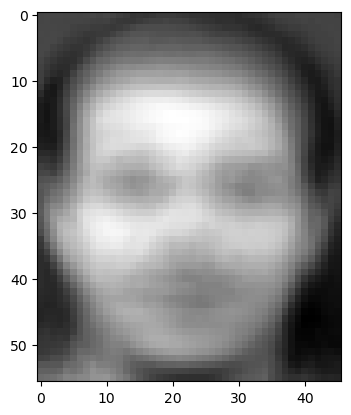

In [30]:
# INSERT CODE HERE
print(T.shape)
T2 = T.reshape(T.shape[0] * T.shape[1], 56, 46)
print(T2.shape)
meanface = np.mean(T2, axis=(0))
print(meanface.shape)
plt.imshow(meanface,cmap='gray')
plt.show()

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [31]:
# TODO: Find the size and the rank of the covariance matrix.
X = T2.copy()
X_mean = meanface
X = X - X_mean
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
print(X.shape)
COV = np.cov(X.T)
print(COV.shape)
print(f"size of cov matrix is {(COV.shape[0]**2)*4 / 10**6} Mb and rank is at most {min(COV.shape[0],120-1)}")

(120, 2576)
(2576, 2576)
size of cov matrix is 26.543104 Mb and rank is at most 119


    ANS: size of cov matrix is 26.543104 Mb and rank is at most 119

### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [32]:
# TODO: Compute gram matrix.
gram_matrix = X @ X.T

In [33]:
# TODO: Show size and rank of Gram matrix.
print(f"gram matrix size is {gram_matrix.shape} and rank is at most 119 ")

gram matrix size is (120, 120) and rank is at most 119 


    ANS: gram matrix size is (120, 120) and rank is at most 119 


## T14. Is the Gram matrix also symmetric? Why?


    ANS: 
    from metrix symmetric when X.T = X
    let (X @ X.T) be Gram matrix
    consider (X @ X.T).T = ( (X.T).T @ X.T)
                         = (X @ X.T)
    so Gram matrix is symmetric

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [34]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE
    # print(matrix.shape)
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    eigenvectors = eigenvectors.T #change to row vector
    idxs = np.argsort(eigenvalues)[::-1]
    # print(eigenvectors.shape)
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    # print(eigenvectors[10].dot(eigenvectors[20]))
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

In [35]:
np.testing.assert_array_almost_equal(gram_matrix @ eigenvectors.T, eigenvalues * eigenvectors.T,decimal= 6,verbose=True)

In [36]:
print(eigenvectors[:2])

[[ 7.82002826e-02  1.56333634e-01  1.40767388e-01  5.25267241e-02
   4.45679467e-02  5.94793358e-02  4.33108199e-03 -2.55776012e-03
   1.24409395e-02 -5.16036471e-03  5.86078913e-04  1.54205126e-02
   6.28224467e-02  6.51767231e-02  5.53518537e-02 -5.12593394e-02
  -5.26128747e-02 -4.48846529e-02 -4.34646174e-02 -4.60471336e-02
  -3.37452792e-02  6.98127695e-04  1.06809452e-03  2.59140144e-02
  -7.07094111e-02 -5.85739578e-02 -5.78958352e-02 -1.39164083e-01
  -1.30425568e-01 -1.21871507e-01 -4.51894913e-02 -2.77502028e-02
  -4.06904667e-03  1.19250703e-01  7.33084355e-02  8.14941327e-02
   1.31758734e-01  1.32193055e-01  1.42268213e-01  1.08983087e-01
   1.00410080e-01  1.06201137e-01  1.39562545e-02 -2.20717988e-02
   8.21777154e-03  3.11803126e-02  4.28792517e-02  6.35081751e-02
   5.53449959e-02  2.28152330e-02 -1.96422707e-02  1.12406471e-01
   1.05020661e-01  1.15151752e-01  1.23043852e-01  1.34586680e-01
   1.58277148e-01 -1.39467182e-01 -1.46589111e-01 -1.29935314e-01
  -1.03893

In [37]:
print(np.count_nonzero(eigenvalues > 1e-12))
eigenvalues

119


array([1.42392971e+03, 8.75375177e+02, 5.58624400e+02, 4.07347157e+02,
       3.71021274e+02, 2.63280801e+02, 2.03396990e+02, 1.90965101e+02,
       1.66548056e+02, 1.43570551e+02, 1.22951200e+02, 1.04788229e+02,
       9.36606993e+01, 8.52020934e+01, 8.00790884e+01, 7.22926270e+01,
       6.92896016e+01, 6.55557914e+01, 6.16791259e+01, 5.90743553e+01,
       5.42659430e+01, 5.19180210e+01, 4.60439029e+01, 4.49517564e+01,
       4.38154370e+01, 4.17882938e+01, 4.04839086e+01, 3.80160594e+01,
       3.72939497e+01, 3.42784031e+01, 3.38082909e+01, 3.24110643e+01,
       3.01160763e+01, 2.88090967e+01, 2.76934934e+01, 2.72362796e+01,
       2.63193795e+01, 2.55181270e+01, 2.42531018e+01, 2.33566654e+01,
       2.24888684e+01, 2.22128871e+01, 2.13271981e+01, 2.05964187e+01,
       1.97567698e+01, 1.91068901e+01, 1.86898335e+01, 1.81386227e+01,
       1.79801629e+01, 1.69617092e+01, 1.63867949e+01, 1.56952212e+01,
       1.56409226e+01, 1.50995911e+01, 1.45534702e+01, 1.38473352e+01,
      

    ANS: มี eigen value ที่ไม่เป็น 0 ทั้งหมด 119 ตัว

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

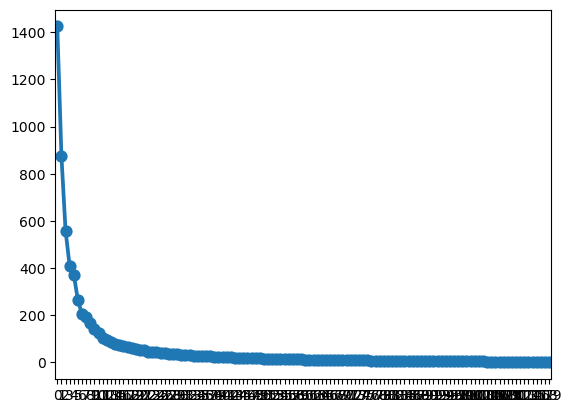

62


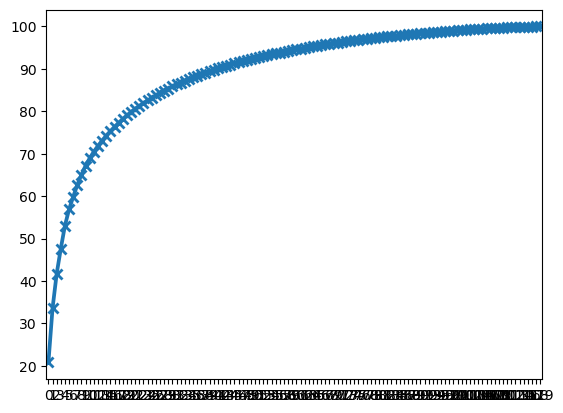

In [38]:
# INSERT CODE HERE
percent_var = (eigenvalues * 100) / np.sum(eigenvalues)
sns.pointplot(eigenvalues)
plt.show()
cum_var = np.cumsum(percent_var)
sns.pointplot(cum_var,markers='x',capsize=0.1)
print(np.argmax(cum_var[cum_var <= 95]))

    ANS: ใช้ 63 eigenvectors

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [39]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE
eigen_metric = eigenvectors
print(eigen_metric.shape)
print(X.shape)
v = eigen_metric @ X 
vv = np.linalg.norm(v,axis=0)
v = v / vv
print(v.shape)
print(vv.shape)

(120, 120)
(120, 2576)
(120, 2576)
(2576,)


In [40]:
def test_eignevector_cov_norm(v):
    print(np.linalg.norm(v,axis= 0))
    assert (np.round(np.linalg.norm(v,axis = 0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

[1. 1. 1. ... 1. 1. 1.]


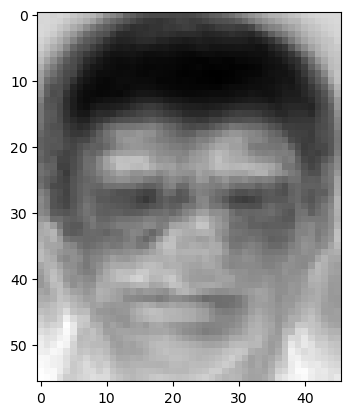

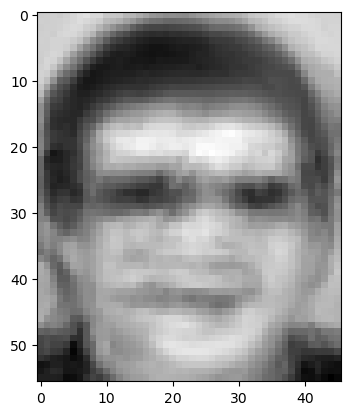

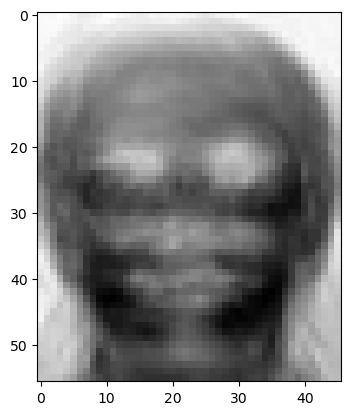

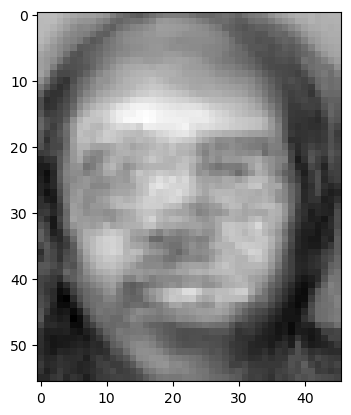

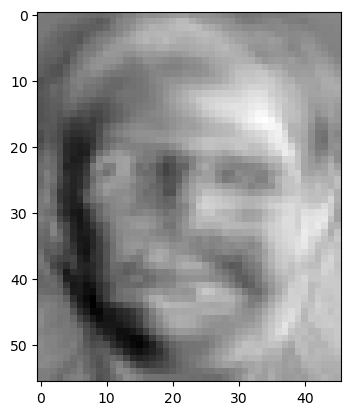

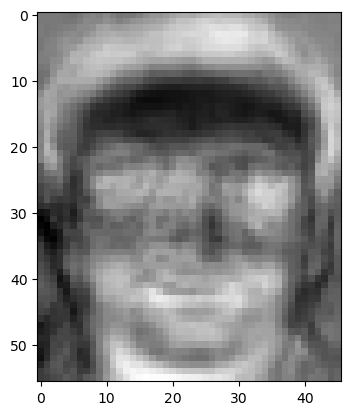

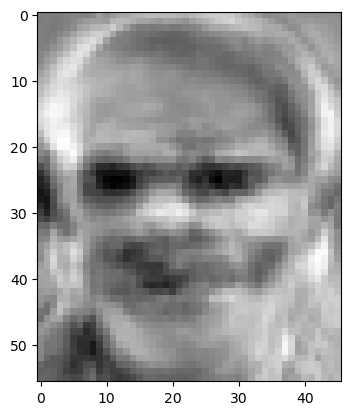

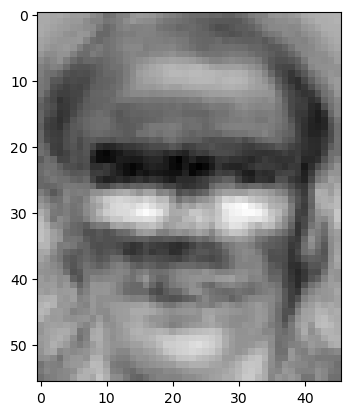

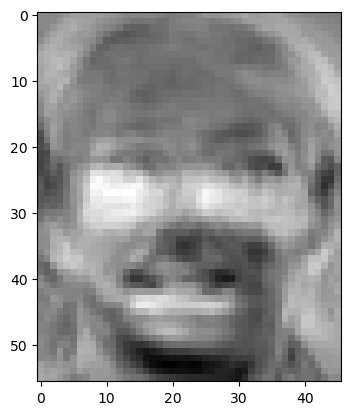

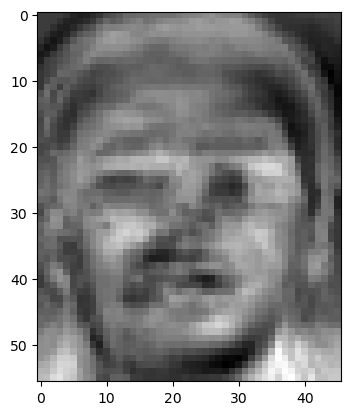

In [41]:
# TODO: Show the first 10 eigenvectors as images.
v = v.reshape(120, 56, 46)
for i in range(10):
    plt.imshow((1-v[i]),cmap='gray')
    plt.show()

### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

    ANS: eigen vector แรกดูเหมือนเก็บ variance ของ คอเสื้อ ปกเสื้อ หรือ BG ส่วน eigen vector ที่สอง ดูเหมือนเก็บ varaince ที่ตรง หน้าผาก หรือ คิ้ว

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [42]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """

    # INSERT CODE HERE
    matrix = matrix - meanface
    matrix = matrix.reshape(matrix.shape[0], matrix.shape[1]*matrix.shape[2])
    # print(v.shape , matrix.shape)
    projection_vectors = v.T @ matrix.T

    return projection_vectors.T

In [43]:
T.shape, D.shape, v.shape

((40, 3, 56, 46), (40, 7, 56, 46), (120, 56, 46))

In [44]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 10
T = T.reshape(120,56,46)
D = D.reshape(280, 56, 46)
T_mean = np.mean(T,axis=0)
D_mean = np.mean(D,axis=0)
print(T_mean.shape, D_mean.shape)
v = v.reshape(120, 56*46)
T_reduced = calculate_projection_vectors(T,T_mean,v[:10].T) 
D_reduced = calculate_projection_vectors(D,D_mean,v[:10].T) 


def test_reduce_dimension():
    print(T_reduced.shape[-1], D_reduced.shape[-1] )
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

(56, 46) (56, 46)
10 10


In [45]:
# TODO: Get similarity matrix of T_reduced and D_reduced
eigen_similar_matrix = generate_similarity_matrix(T_reduced,D_reduced)
print(eigen_similar_matrix.shape)

(120, 280)


In [46]:
# TODO: Find EER and the recall rate at 0.1% FAR.
calculate_roc_2(eigen_similar_matrix)

At far = 0.001 tpr is  0.4142857142857143
At far = 0.001 tpr is  0.4142857142857143
At EER tpr and far is  0.9107142857142857 0.0880952380952381
At EER tpr and far is  0.9107142857142857 0.0891941391941392


    ANS: At far = 0.001 tpr is  0.4142857142857143, At EER tpr and far is  0.9107142857142857 0.08626373626373626

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


In [47]:
# INSERT CODE HERE
ks = [i for i in range(5,15)]
for k in ks:
    T_reduced = calculate_projection_vectors(T,T_mean,v[:k].T) 
    D_reduced = calculate_projection_vectors(D,D_mean,v[:k].T) 
    eigen_similar_matrix2 = generate_similarity_matrix(T_reduced,D_reduced)
    print("k = ", k)
    calculate_roc_2(eigen_similar_matrix2)
    print("==============================")

k =  5
At far = 0.001 tpr is  0.12142857142857143
At far = 0.001 tpr is  0.125
At far = 0.001 tpr is  0.14285714285714285
At EER tpr and far is  0.9 0.09633699633699634
At EER tpr and far is  0.9 0.09789377289377289
At EER tpr and far is  0.9 0.09908424908424908
k =  6
At far = 0.001 tpr is  0.2
At far = 0.001 tpr is  0.21071428571428572
At far = 0.001 tpr is  0.21785714285714286
At far = 0.001 tpr is  0.22857142857142856
At far = 0.001 tpr is  0.23214285714285715
At far = 0.001 tpr is  0.2357142857142857
At far = 0.001 tpr is  0.2642857142857143
At far = 0.001 tpr is  0.2714285714285714
At far = 0.001 tpr is  0.275
At far = 0.001 tpr is  0.28214285714285714
At far = 0.001 tpr is  0.28214285714285714
At far = 0.001 tpr is  0.2892857142857143
At EER tpr and far is  0.9035714285714286 0.09395604395604396
At EER tpr and far is  0.9035714285714286 0.09587912087912089
At EER tpr and far is  0.9035714285714286 0.09652014652014652
At EER tpr and far is  0.9035714285714286 0.09807692307692308


    ANS: k = 13 ให้ค่า tpr = 0.9142857142857143 ซึ่งสูงที่สุด

## OT2

In [48]:
T = T.reshape(120,56,46)
D = D.reshape(280, 56, 46)
T_mean = np.mean(T,axis=0)
D_mean = np.mean(D,axis=0)
print(T_mean.shape, D_mean.shape)
v = v.reshape(120, 56*46)
T_reduced = calculate_projection_vectors(T,T_mean,v[:10].T) 
print(T_reduced.shape)
print( v[:10].shape)
T_bar = T_mean + (T_reduced @ v[:10]).reshape(120,56,46)
mse = np.sum((T_bar[0] - T[0])**2) / (56*46)
print(mse)

(56, 46) (56, 46)
(120, 10)
(10, 2576)
1479.4612454937221


## OT3

In [50]:
v.shape, T_reduced.shape

((120, 2576), (120, 10))

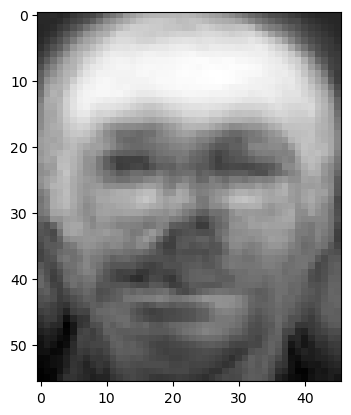

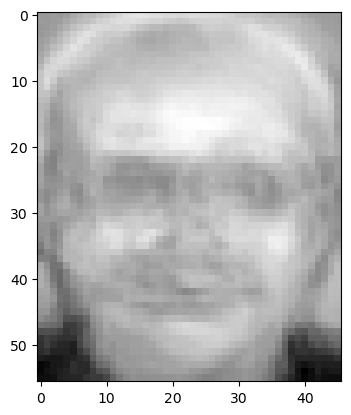

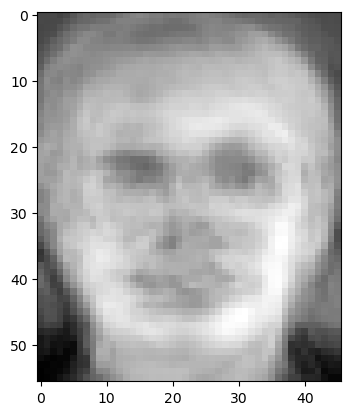

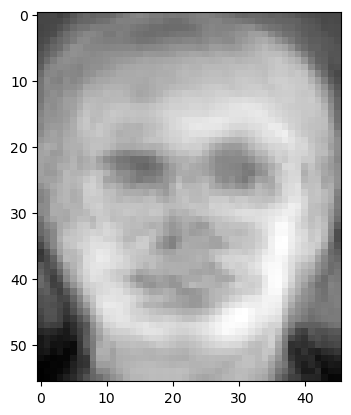

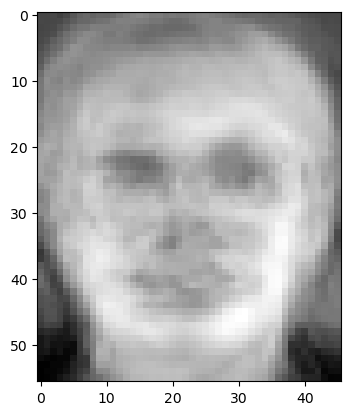

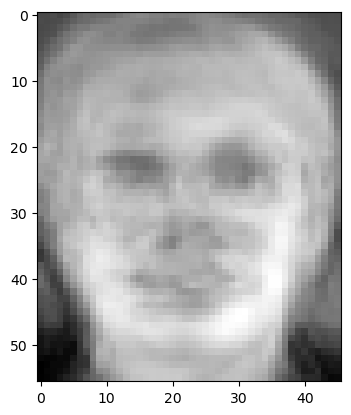

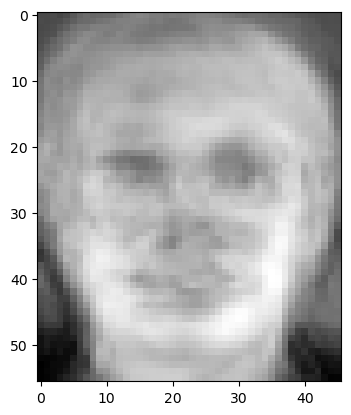

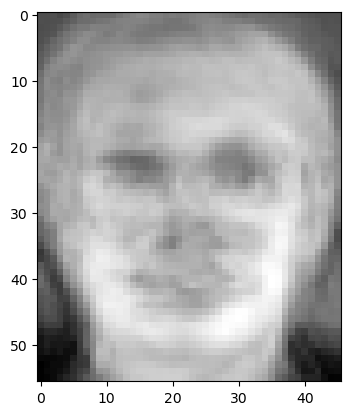

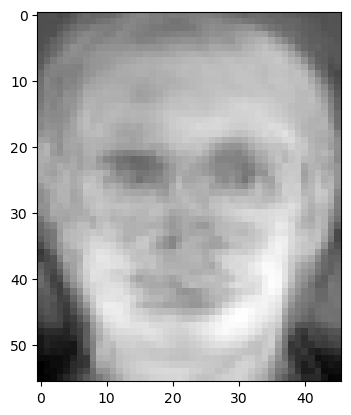

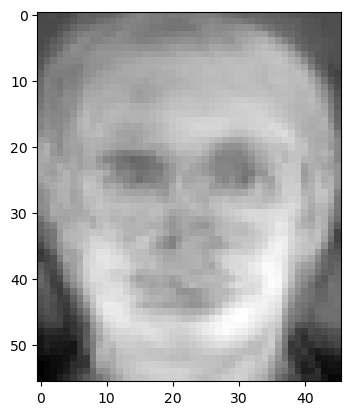

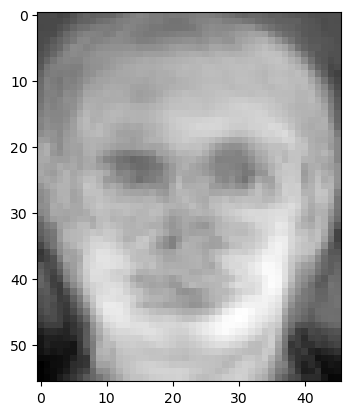

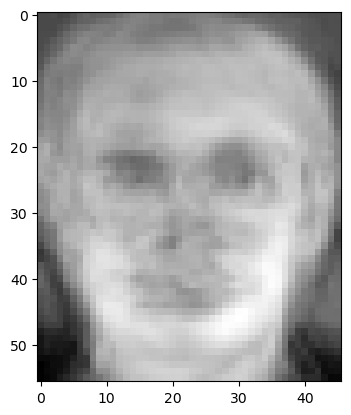

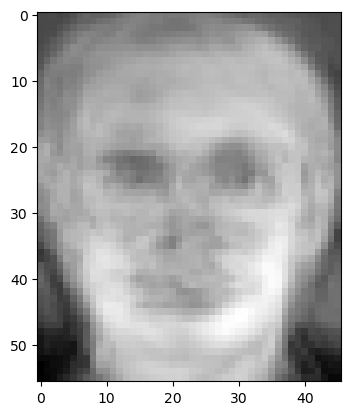

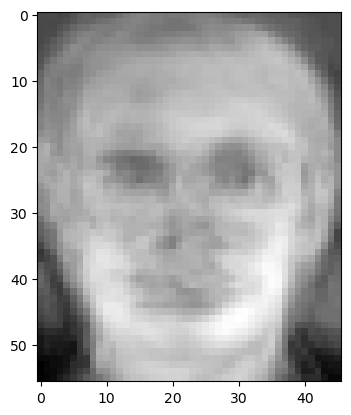

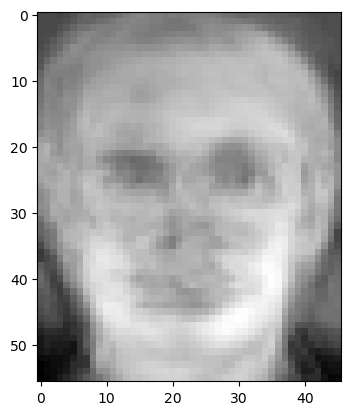

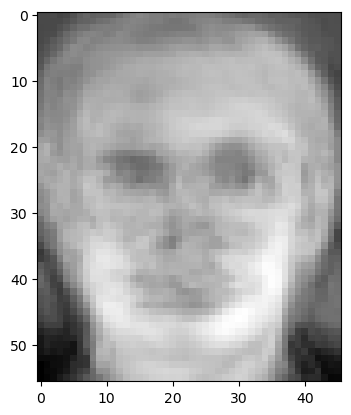

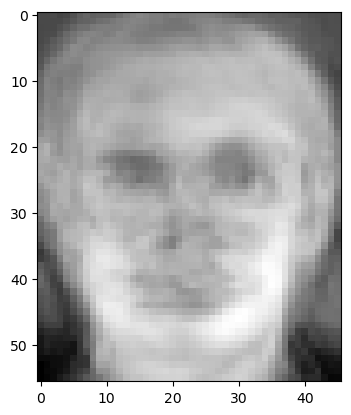

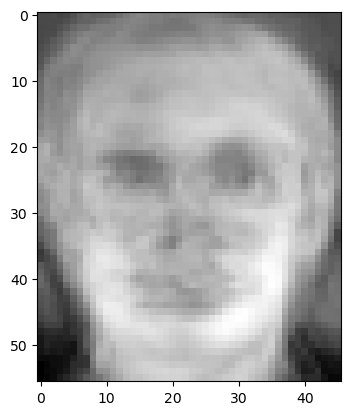

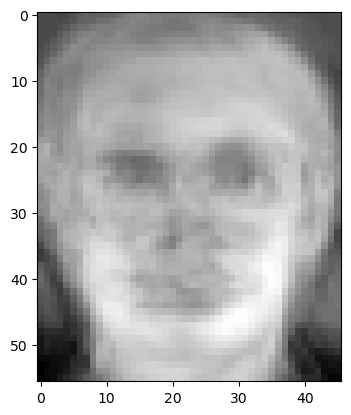

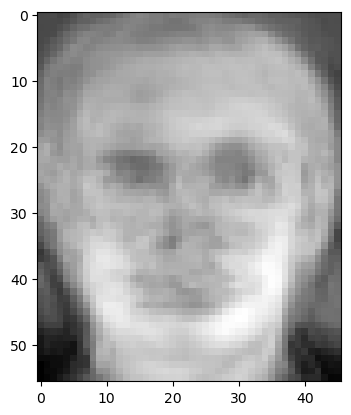

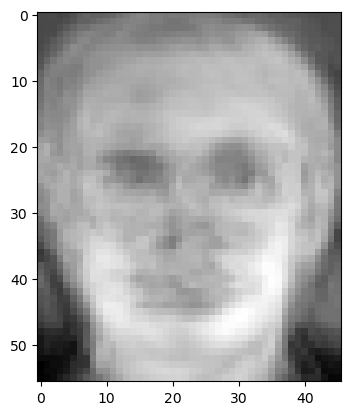

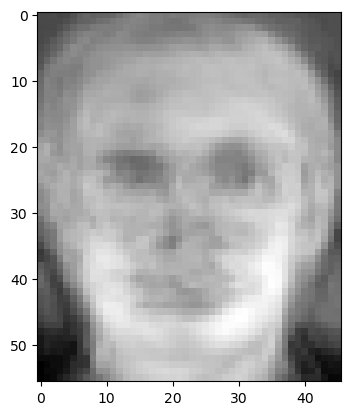

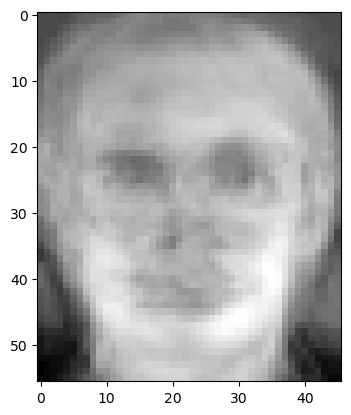

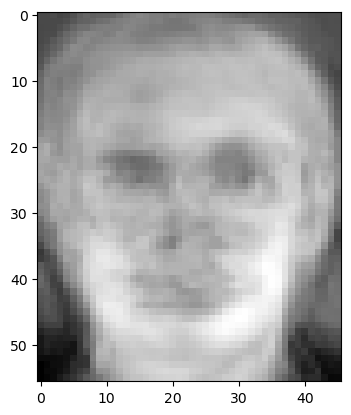

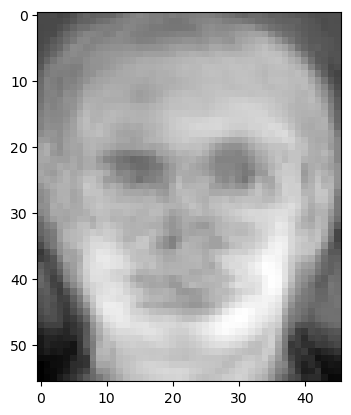

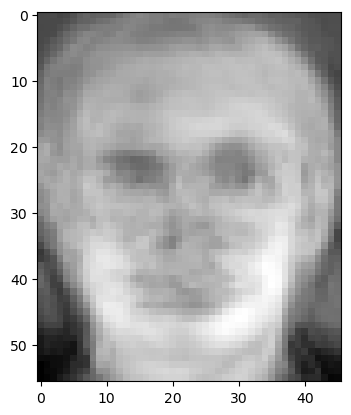

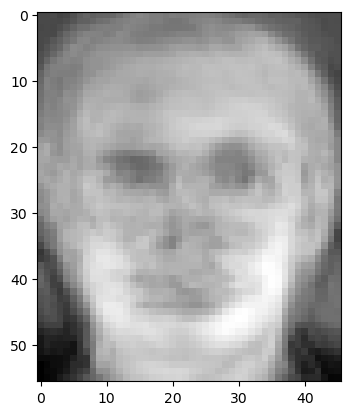

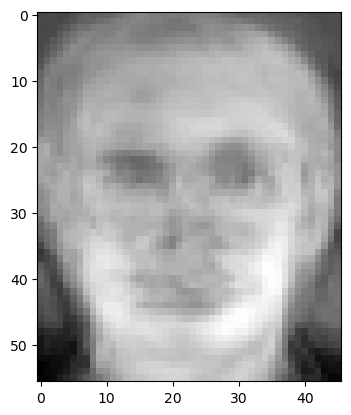

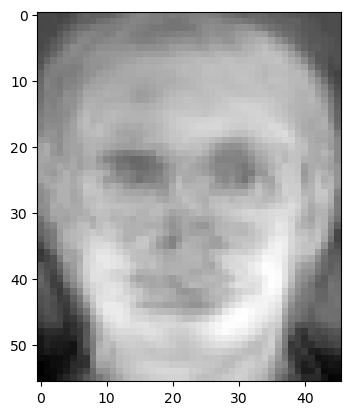

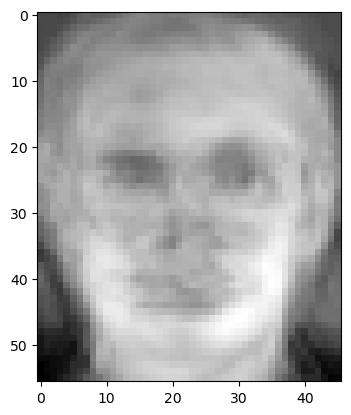

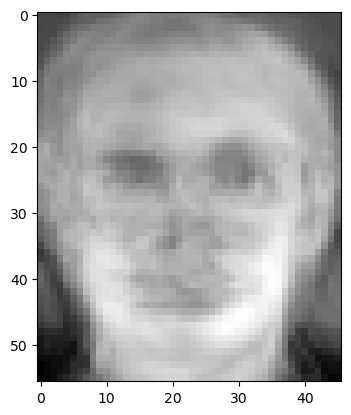

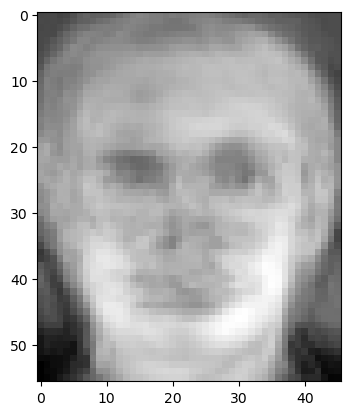

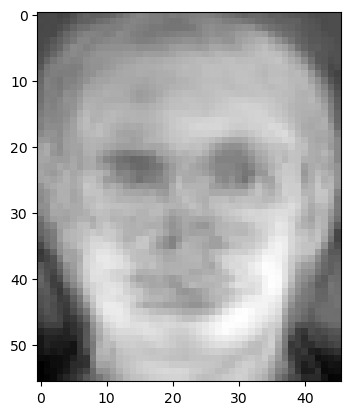

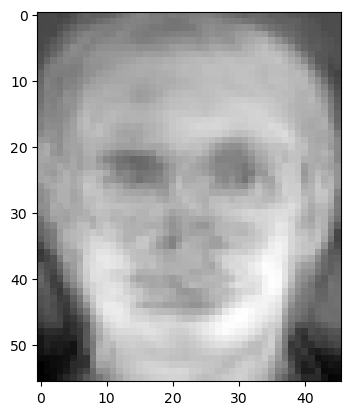

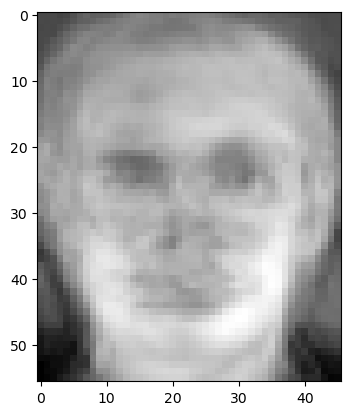

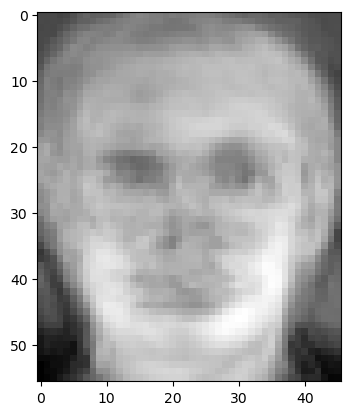

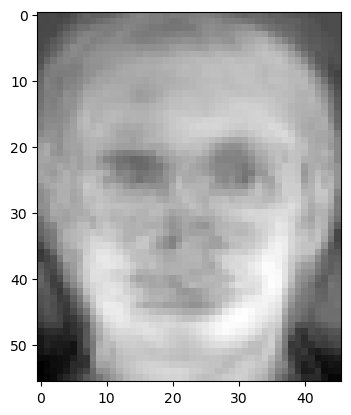

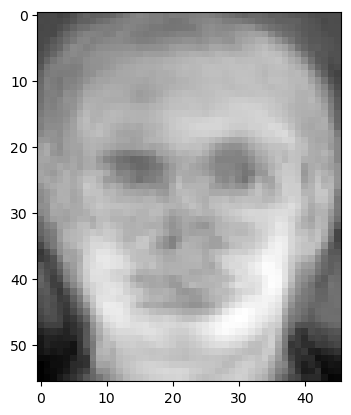

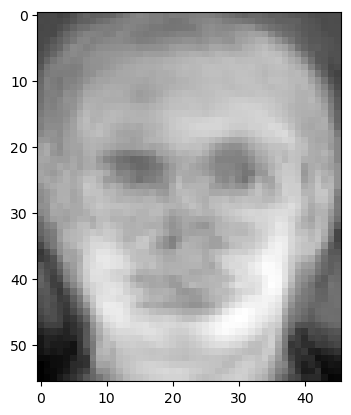

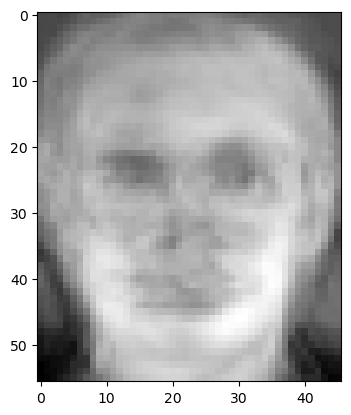

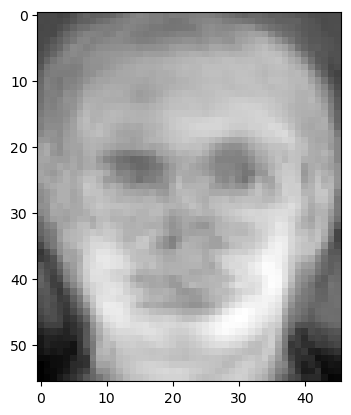

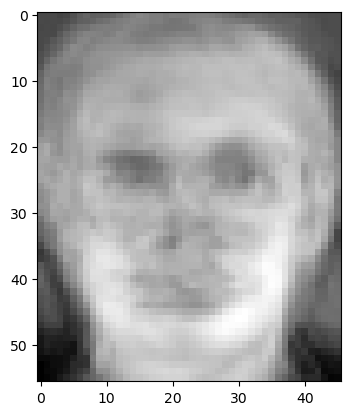

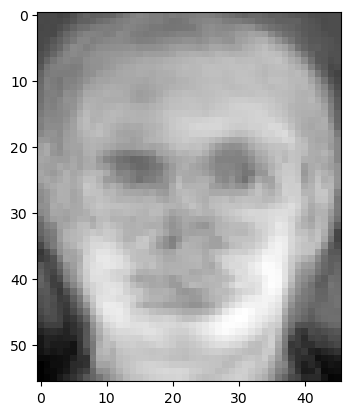

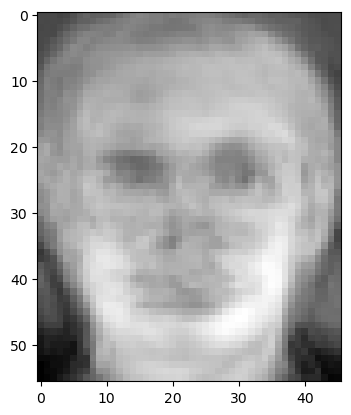

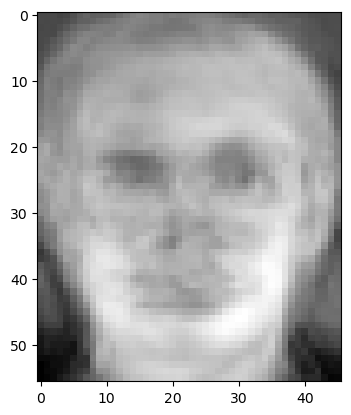

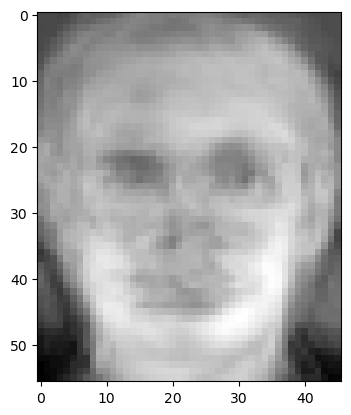

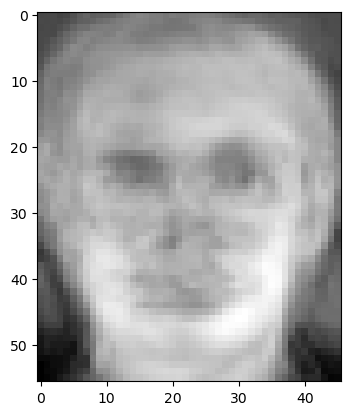

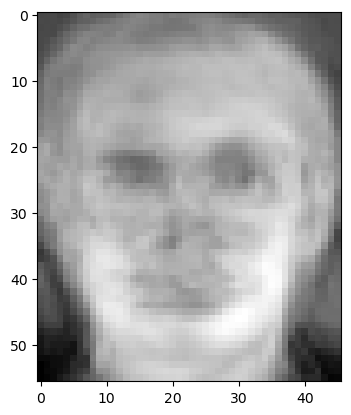

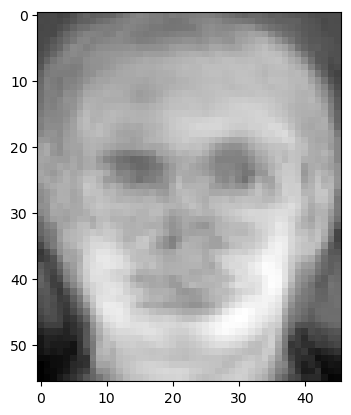

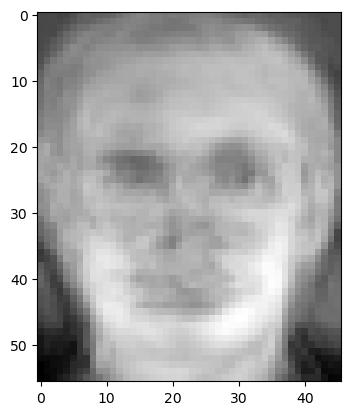

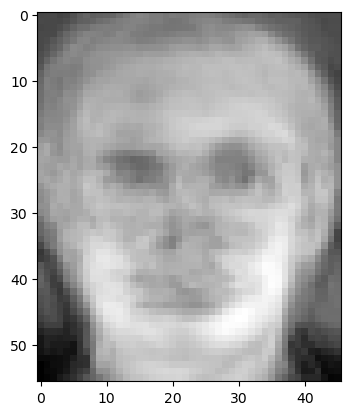

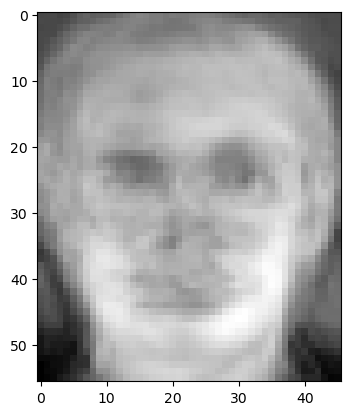

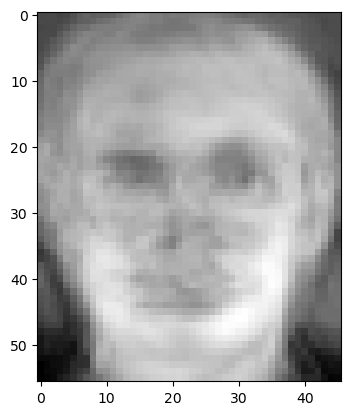

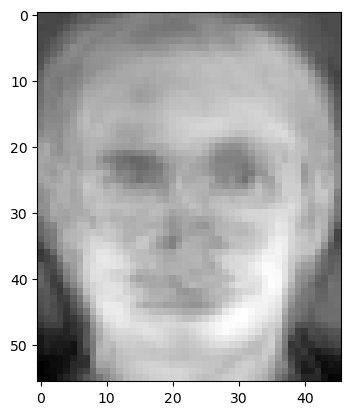

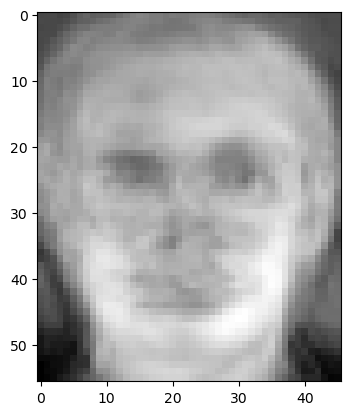

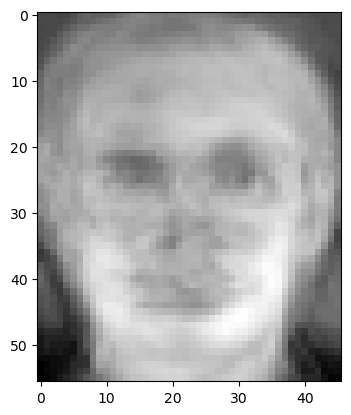

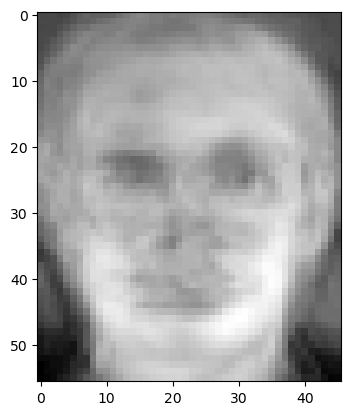

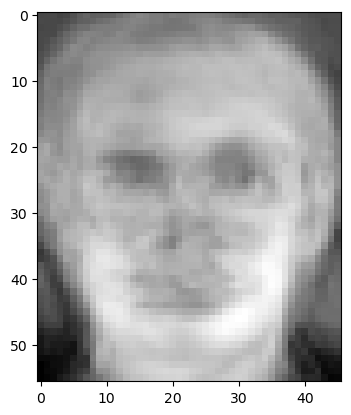

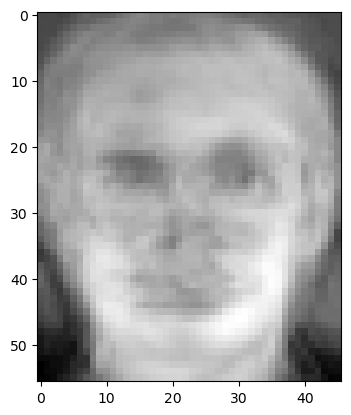

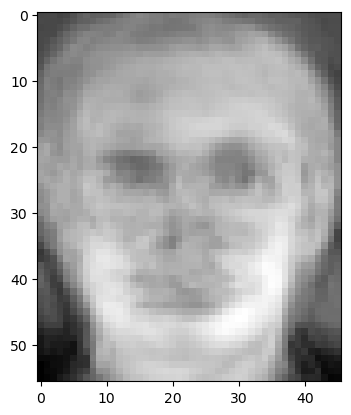

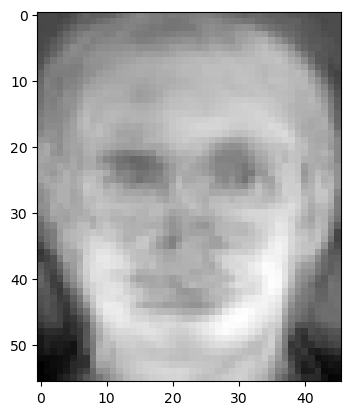

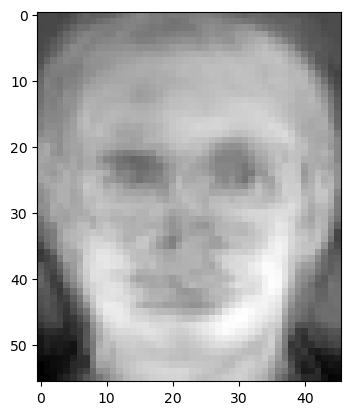

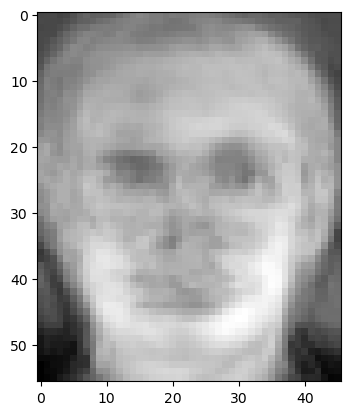

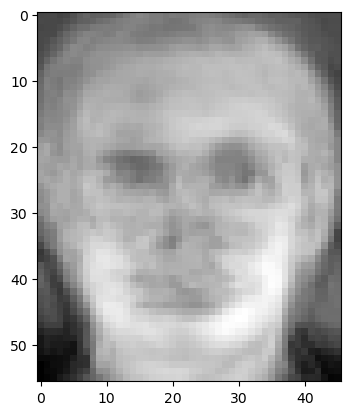

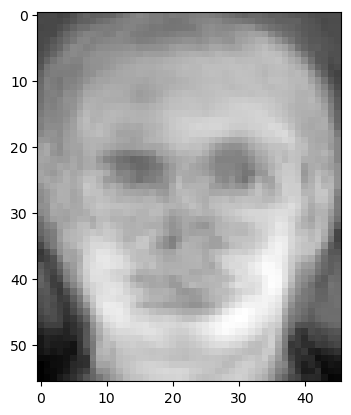

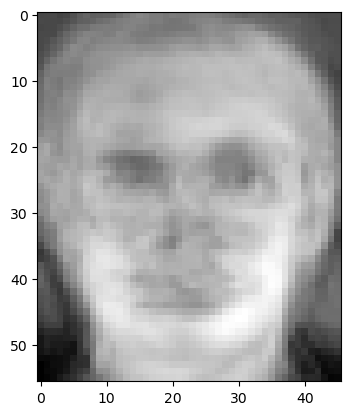

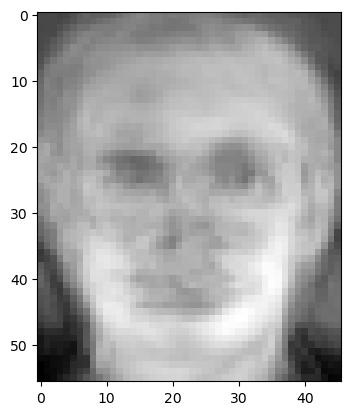

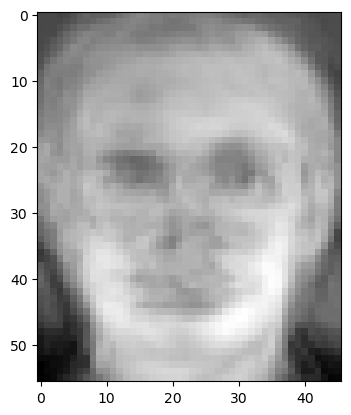

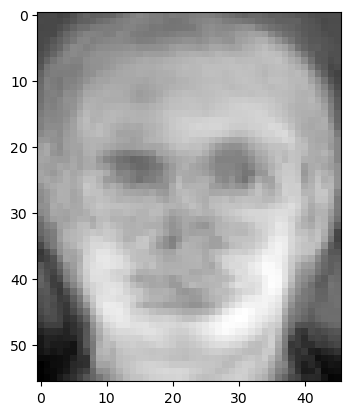

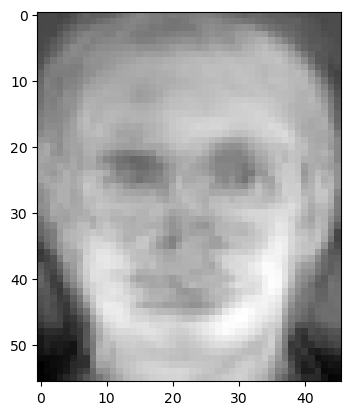

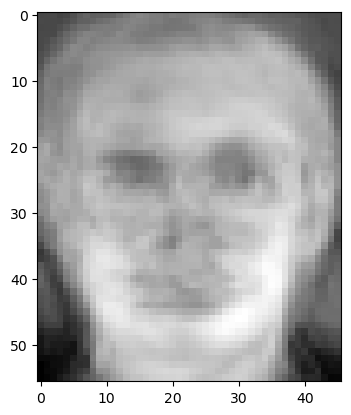

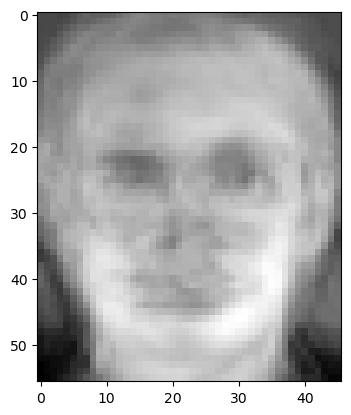

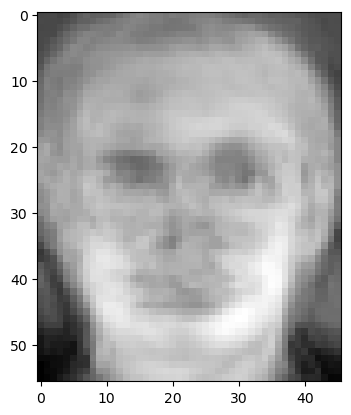

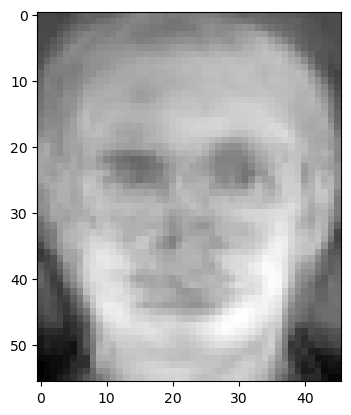

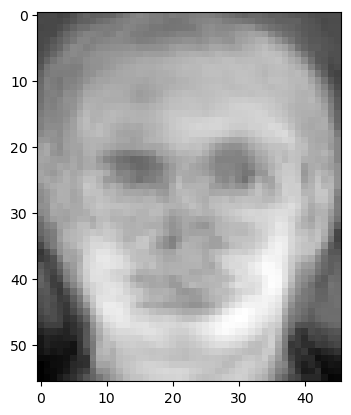

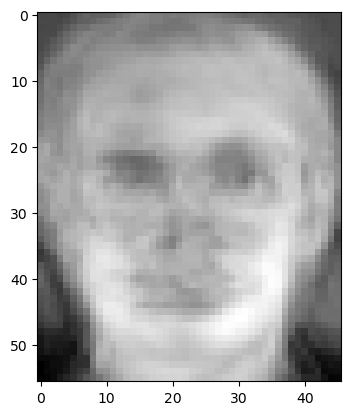

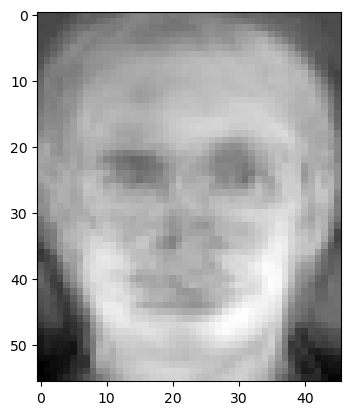

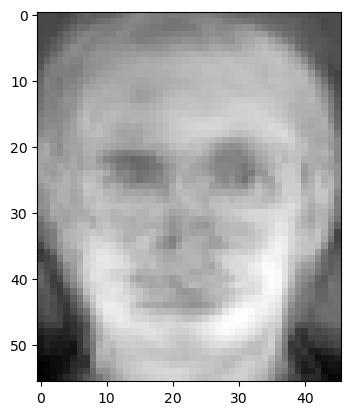

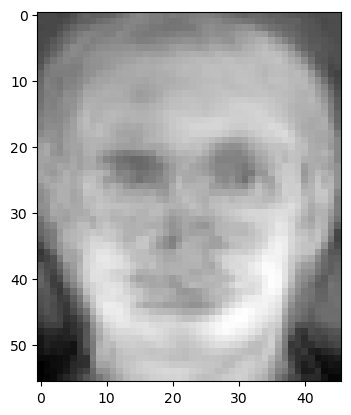

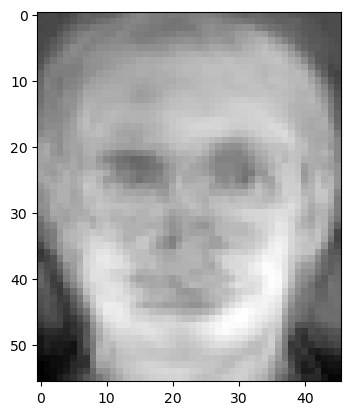

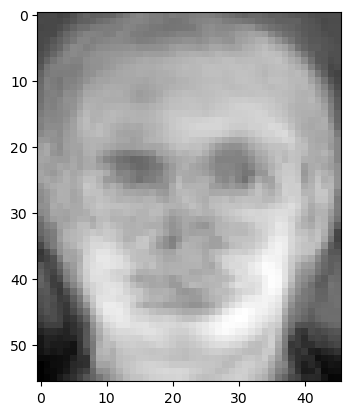

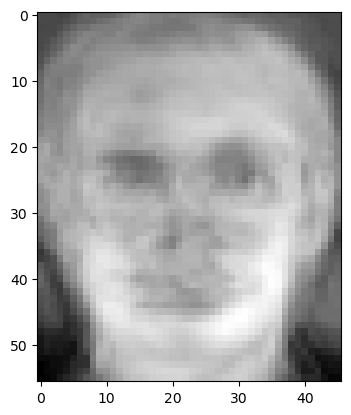

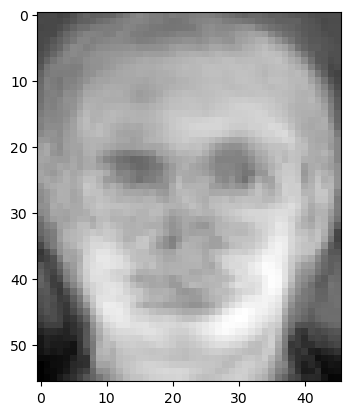

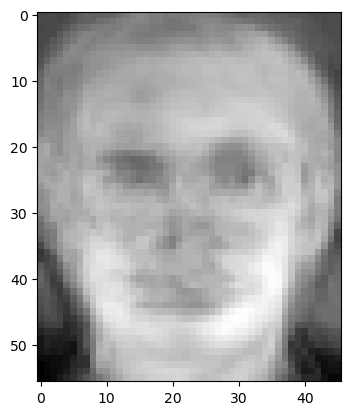

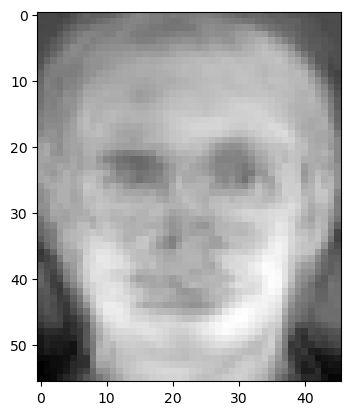

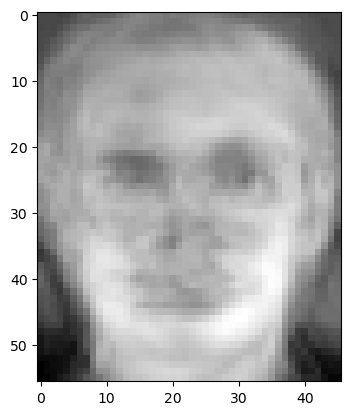

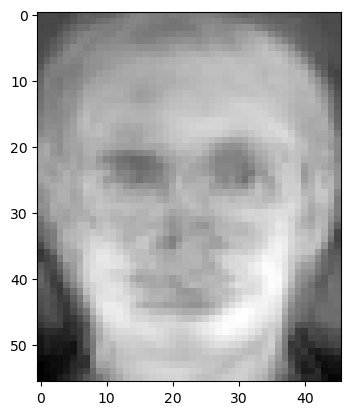

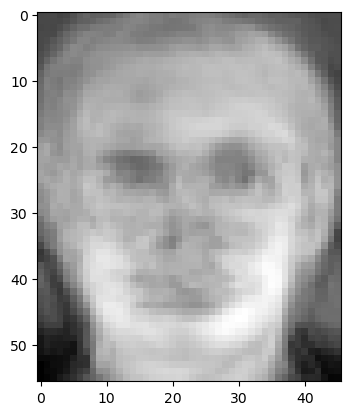

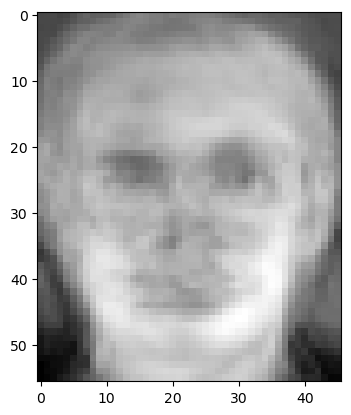

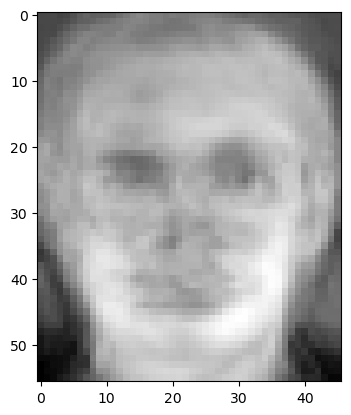

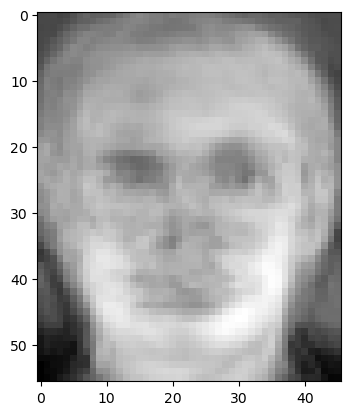

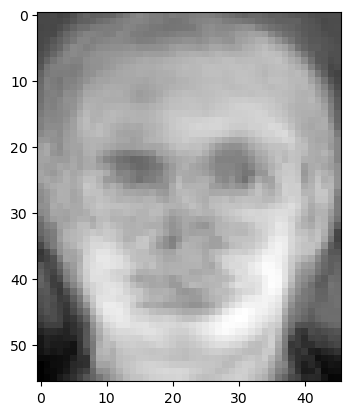

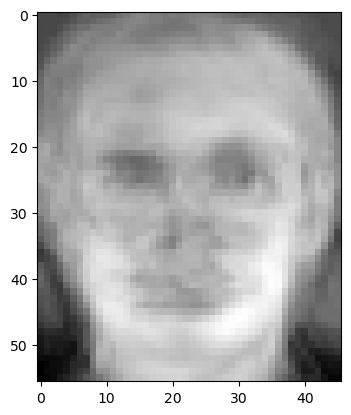

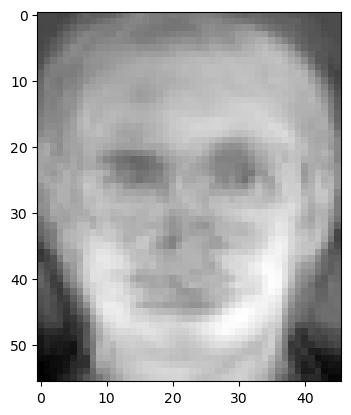

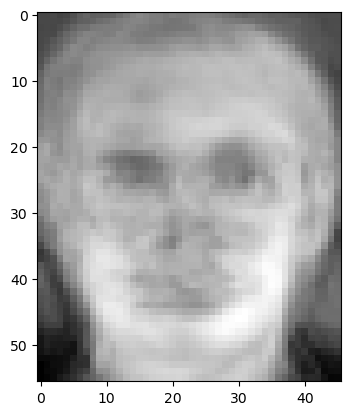

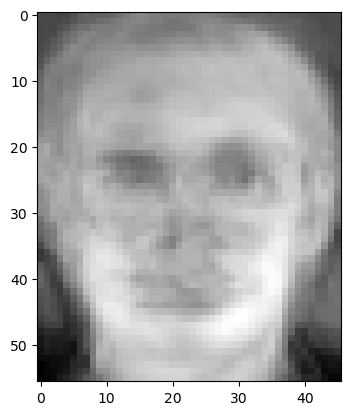

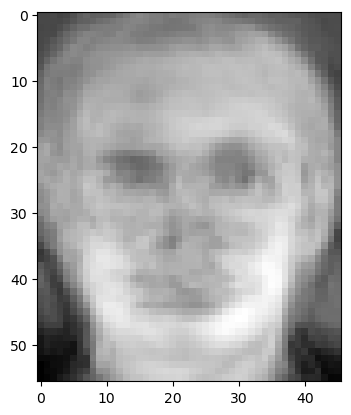

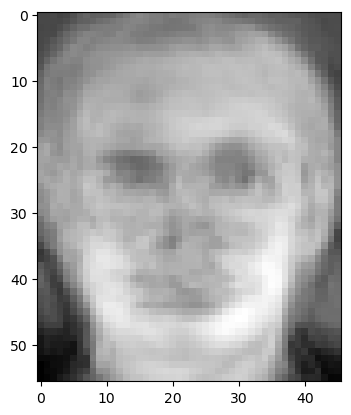

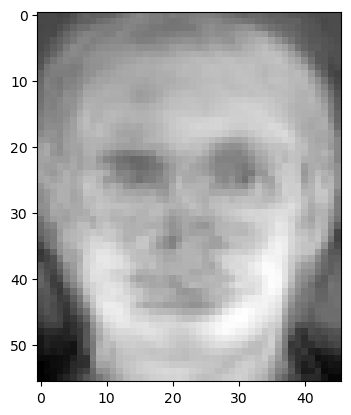

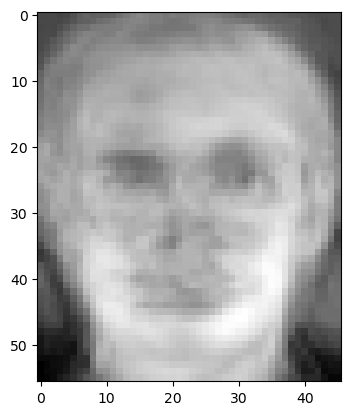

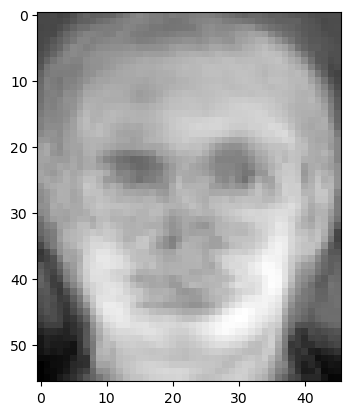

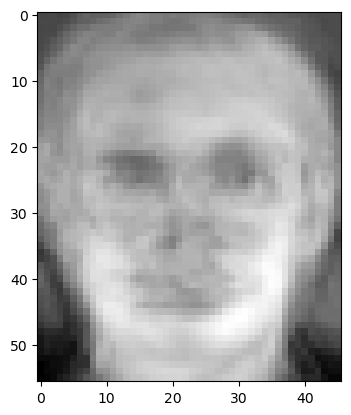

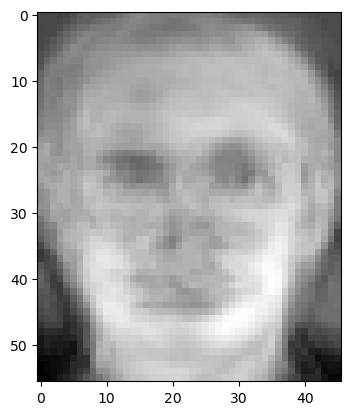

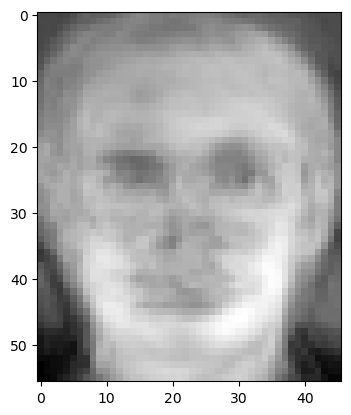

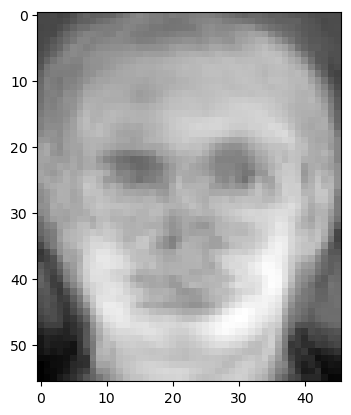

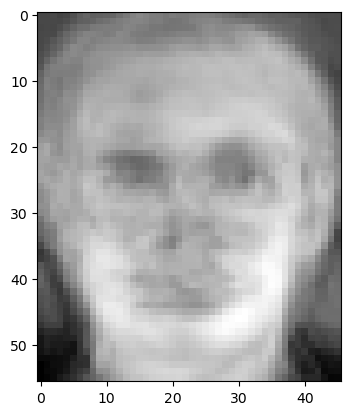

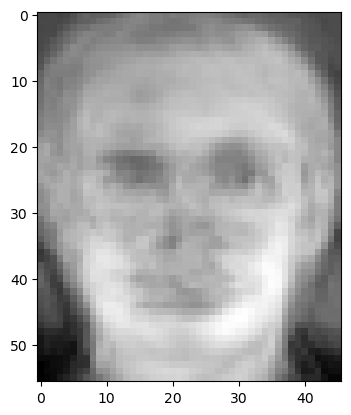

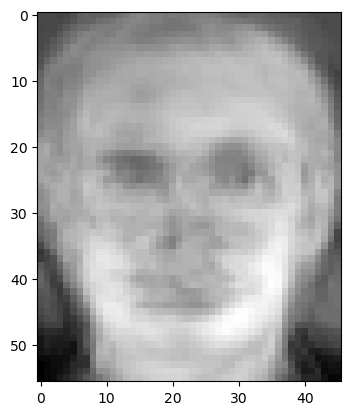

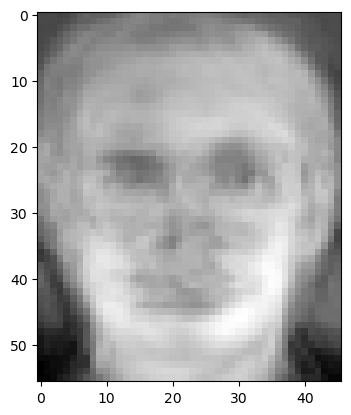

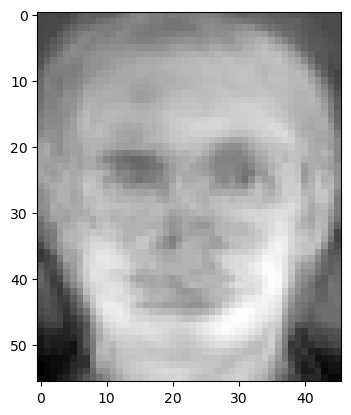

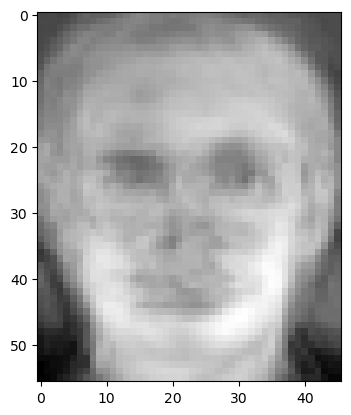

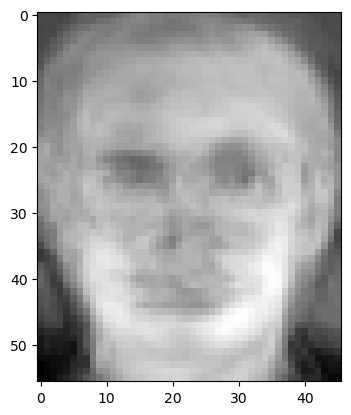

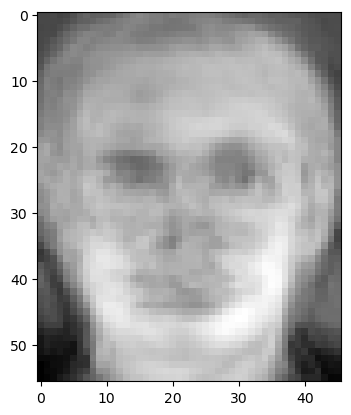

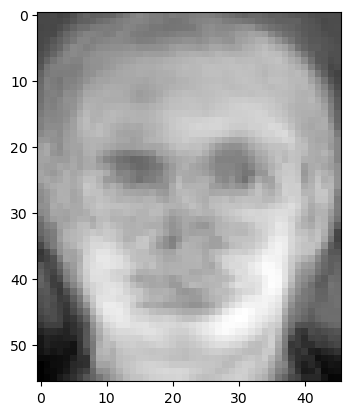

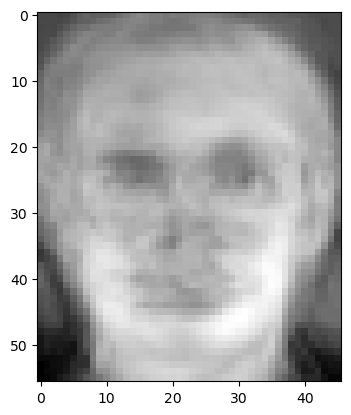

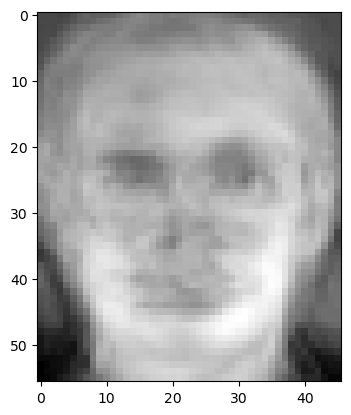

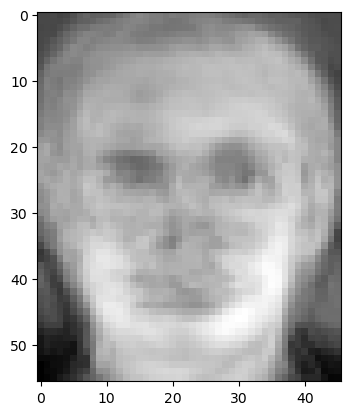

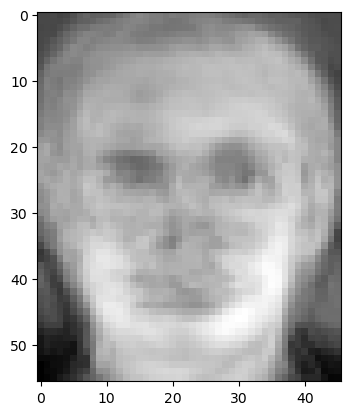

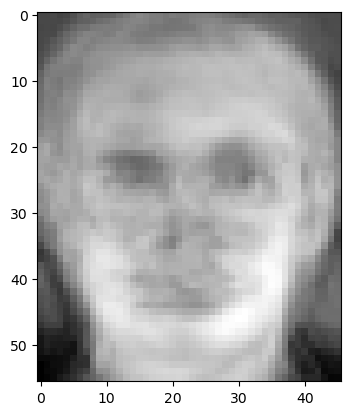

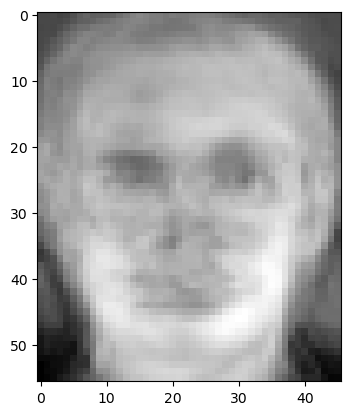

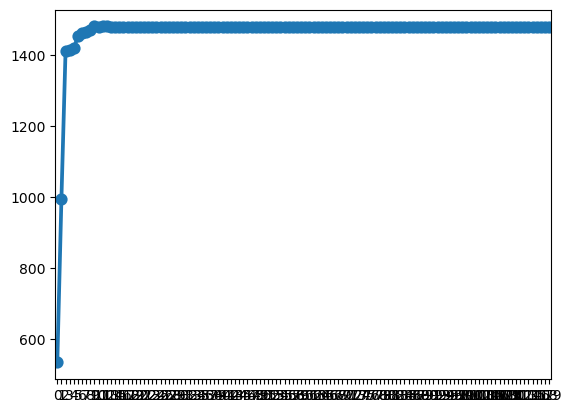

In [51]:
mse_list = []
for k in range(1,121):
    T_reduced = calculate_projection_vectors(T,T_mean,v[:k].T) 
    T_bar = T_mean + (T_reduced @ v[:k]).reshape(120,56,46)
    mse = np.sum((T_bar[0] - T[0])**2) / (56*46)
    mse_list.append(mse)
    plt.imshow(T_bar[0],cmap='gray')
    plt.show()
sns.pointplot(mse_list)
plt.show()

## OT4


    Ans: size = X_mean_size + X_reduce_size*N + V_size
          = (56*46 + 120*10*1000000 + 10*2576)*32 bits
          = 38.4 Gb

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS: Sw ต้องมี dimensions = N-N_c เพื่อที่จะให้ Sw เป็น full rank

In [52]:
# TODO: Define dimension of PCA.
n_dim = 80 # 120 data 40 classes

# TODO: Find PCA of T and D with n_dim dimension.
T = T.reshape(120,56,46)
D = D.reshape(280, 56, 46)
T_mean = np.mean(T,axis=0)
D_mean = np.mean(D,axis=0)
v = v.reshape(120, 56*46)
T_reduced = calculate_projection_vectors(T,T_mean,v[:n_dim].T) 
D_reduced = calculate_projection_vectors(D,D_mean,v[:n_dim].T) 

### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [53]:
T_reduced.shape, D_reduced.shape

((120, 80), (280, 80))

In [54]:
def calculate_eigenvectors_and_eigenvalues2(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE
    # print(matrix.shape)
    eigenvalues, eigenvectors = np.linalg.eig(matrix) # change eigh -> eig
    eigenvectors = eigenvectors.T #change to row vector
    idxs = np.argsort(np.absolute(eigenvalues))[::-1]
    # print(eigenvectors.shape)
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    return eigenvalues, eigenvectors

In [55]:
# TODO: Find the LDA projection.
global_mean_T = np.mean(T_reduced, axis = 0)
global_mean_D = np.mean(D_reduced, axis = 0)
Sb_T = None
Sb_D = None
mu_T = []
mu_D = []
for i in range(40):
    temp = np.mean(T_reduced[i*3:i*3 + 3], axis = 0).reshape(80,1)
    mu_T.append(temp)
    if(Sb_T is not None):
        Sb_T += (temp - global_mean_T) @ (temp - global_mean_T).T
    else:
        Sb_T = (temp - global_mean_T) @ (temp - global_mean_T).T
for i in range(40):
    temp = np.mean(D_reduced[i*7:i*7 + 7], axis = 0).reshape(80,1)
    mu_D.append(temp)
    if(Sb_D is not None):
        Sb_D += (temp - global_mean_D) @ (temp - global_mean_D).T
    else:
        Sb_D = (temp - global_mean_D) @ (temp - global_mean_D).T
print(Sb_T.shape, Sb_D.shape)
Sw_T = None
Sw_D = None
for i in range(len(mu_T)):
    temp = (T_reduced[i*3] - mu_T[i].T).T @ (T_reduced[i*3] - mu_T[i].T)
    for j in range(1,3):
        temp += (T_reduced[i*3 + j] - mu_T[i].T).T @ (T_reduced[i*3 + j] - mu_T[i].T)
    if(Sw_T is not None):
        Sw_T += temp
    else:
        Sw_T = temp.copy()
for i in range(len(mu_D)):
    temp = (D_reduced[i*7] - mu_D[i].T).T @ (D_reduced[i*7] - mu_D[i].T)
    for j in range(1,7):
        temp += (D_reduced[i*7 + j] - mu_D[i].T).T @ (D_reduced[i*7 + j] - mu_D[i].T)
    if(Sw_D is not None):
        Sw_D += temp
    else:
        Sw_D = temp.copy() 
print(Sw_T.shape, Sw_D.shape)
matrix_T = np.linalg.inv(Sw_T) @ Sb_T
matrix_D = np.linalg.inv(Sw_D) @ Sb_D
print(matrix_T.shape, matrix_D.shape)
w_T_value , w_T = calculate_eigenvectors_and_eigenvalues2(matrix_T)
w_D_value , w_D = calculate_eigenvectors_and_eigenvalues2(matrix_D)

(80, 80) (80, 80)
(80, 80) (80, 80)
(80, 80) (80, 80)


In [56]:
np.linalg.inv(Sw_T).shape

(80, 80)

In [57]:
np.testing.assert_array_almost_equal(matrix_T @ w_T.T, w_T_value * w_T.T,decimal= 6,verbose=True)

In [58]:
w_T_value

array([ 2.93779544e+08+0.00000000e+00j,  4.22025096e+05+0.00000000e+00j,
        1.00669949e+05+0.00000000e+00j,  6.97182473e+04+0.00000000e+00j,
        4.69345082e+04+0.00000000e+00j,  2.68085013e+04+0.00000000e+00j,
        2.00108876e+04+0.00000000e+00j,  1.27092736e+04+0.00000000e+00j,
        1.03023325e+04+0.00000000e+00j,  7.89945008e+03+0.00000000e+00j,
        6.24896223e+03+0.00000000e+00j,  5.49619439e+03+0.00000000e+00j,
        3.04467916e+03+0.00000000e+00j,  2.69358913e+03+0.00000000e+00j,
        2.48789452e+03+0.00000000e+00j,  1.94653372e+03+0.00000000e+00j,
        1.90147067e+03+0.00000000e+00j,  1.46251041e+03+0.00000000e+00j,
        1.16419396e+03+0.00000000e+00j,  1.02327012e+03+0.00000000e+00j,
        8.63896069e+02+0.00000000e+00j,  7.90888414e+02+0.00000000e+00j,
        6.49695436e+02+0.00000000e+00j,  5.10615127e+02+0.00000000e+00j,
        4.36636084e+02+0.00000000e+00j,  3.83516252e+02+0.00000000e+00j,
        3.42219327e+02+0.00000000e+00j,  3.31193260

In [59]:
np.absolute(w_T_value)

array([2.93779544e+08, 4.22025096e+05, 1.00669949e+05, 6.97182473e+04,
       4.69345082e+04, 2.68085013e+04, 2.00108876e+04, 1.27092736e+04,
       1.03023325e+04, 7.89945008e+03, 6.24896223e+03, 5.49619439e+03,
       3.04467916e+03, 2.69358913e+03, 2.48789452e+03, 1.94653372e+03,
       1.90147067e+03, 1.46251041e+03, 1.16419396e+03, 1.02327012e+03,
       8.63896069e+02, 7.90888414e+02, 6.49695436e+02, 5.10615127e+02,
       4.36636084e+02, 3.83516252e+02, 3.42219327e+02, 3.31193260e+02,
       2.74140429e+02, 1.97736034e+02, 1.78633068e+02, 1.53483250e+02,
       1.31734919e+02, 1.20546908e+02, 8.70352030e+01, 6.18316070e+01,
       5.71450899e+01, 4.06561682e+01, 2.76451287e+01, 8.24650086e-09,
       7.02094338e-09, 7.02094338e-09, 6.44532186e-09, 6.44532186e-09,
       5.65308437e-09, 4.59875634e-09, 4.59875634e-09, 3.49608089e-09,
       3.49608089e-09, 3.24931424e-09, 2.67070977e-09, 2.67070977e-09,
       2.42905048e-09, 2.29680802e-09, 2.29680802e-09, 2.05567961e-09,
      

In [60]:
# TODO: Find how many non-zero eigenvalues there are.
print("non zero eigenvalue of w_T:",np.count_nonzero((w_T_value) > 1e-8))
print("non zero eigenvalue of w_D:",np.count_nonzero((w_D_value) > 1e-8))

non zero eigenvalue of w_T: 39
non zero eigenvalue of w_D: 39


    ANS:non zero eigenvalue of w_T: 39
        non zero eigenvalue of w_D: 39
        Sw-1 @ Sb is not symmetric

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

In [61]:
w_T.shape, v.shape

((80, 80), (120, 2576))

(80, 2576)


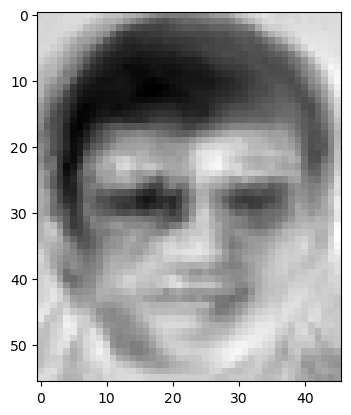

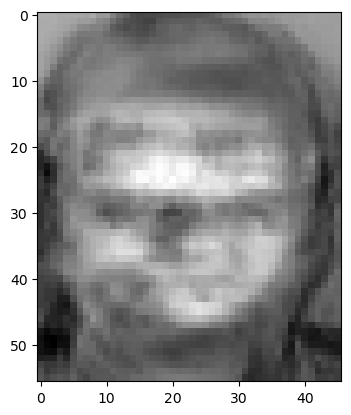

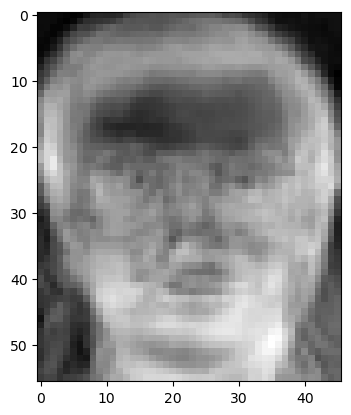

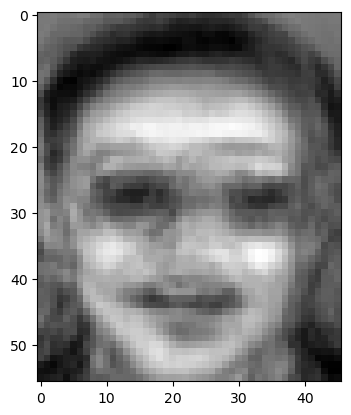

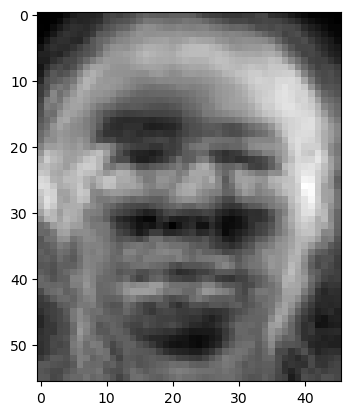

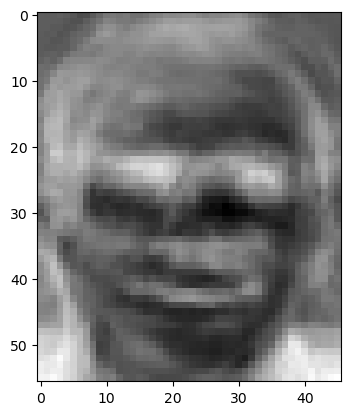

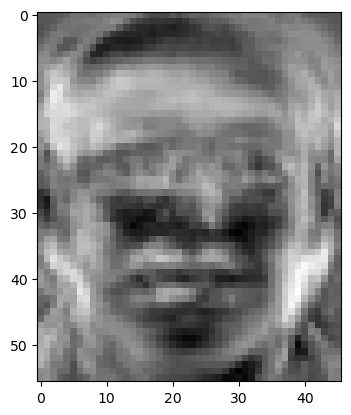

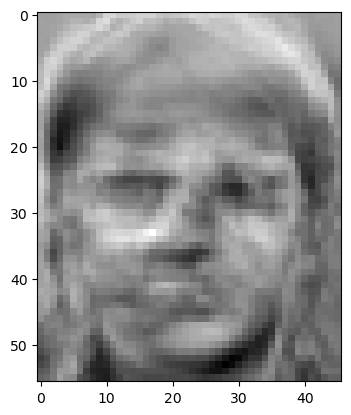

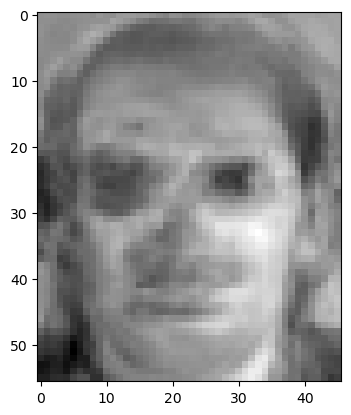

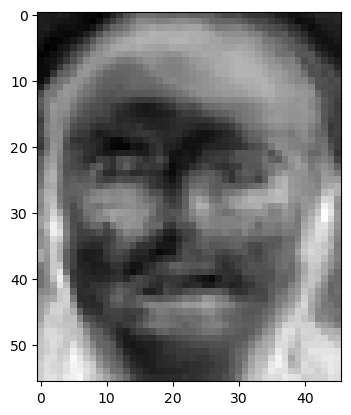

In [62]:
# INSERT CODE HERE
w_T = w_T / np.linalg.norm(w_T, axis=0)
img_LDA = w_T.T @ v[:80]
print(img_LDA.shape)
for i in range(10):
    plt.imshow(1 -np.real(img_LDA[i]).reshape(56,46),cmap='gray')
    plt.show()

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

In [63]:
T.shape

(120, 56, 46)

In [68]:
# INSERT CODE HERE
print(T_reduced.shape, w_T.shape)
#project PCA to LDA
w_T = w_T / np.linalg.norm(w_T, axis=0)
print(np.linalg.norm(w_T, axis=0))
LDA_T = T_reduced @ w_T.T
LDA_T = LDA_T / np.linalg.norm(LDA_T, axis=0)
w_D = w_D / np.linalg.norm(w_D, axis=0)
LDA_D = D_reduced @ w_T.T # ใช้ w เดียวกัน
LDA_D = LDA_D / np.linalg.norm(LDA_D, axis=0)
print(LDA_T.shape, LDA_D.shape)
similarity_matrix_LDA = generate_similarity_matrix(LDA_T, LDA_D)
calculate_roc_2(similarity_matrix_LDA)

(120, 80) (80, 80)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
(120, 80) (280, 80)
At far = 0.001 tpr is  0.30714285714285716
At far = 0.001 tpr is  0.30714285714285716
At far = 0.001 tpr is  0.3107142857142857
At far = 0.001 tpr is  0.3142857142857143
At EER tpr and far is  0.8928571428571429 0.10934065934065934


    ANS:At far = 0.001 tpr is  0.30714285714285716
        At EER tpr and far is  0.8928571428571429 0.10934065934065934

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

<Axes: >

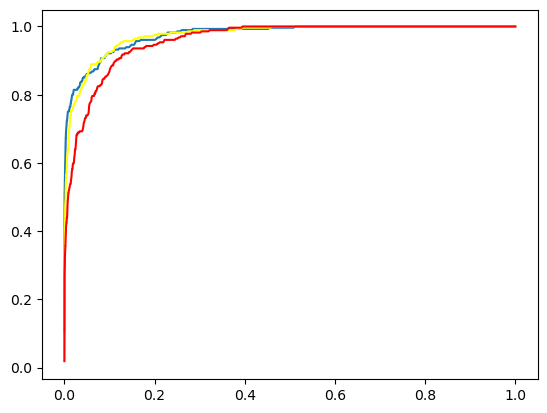

In [69]:
# INSERT CODE HERE
tpr1, far1 = calculate_roc(similarity_matrix)
tpr2, far2 = calculate_roc(eigen_similar_matrix)
tpr3, far3 = calculate_roc(similarity_matrix_LDA)
sns.lineplot(x=far1,y=tpr1)
sns.lineplot(x=far2,y=tpr2, color="yellow")
sns.lineplot(x=far3,y=tpr3, color = 'r')

    ANS: จาก plot PCA (สีเหลือง) จะให้ tpr ดีที่สุด ที่ far เดียวกัน ถัดมาเป็น No projection (สีน้ำเงิน) และสุดท้าย LDA (สีแดง)